# Exploratory Data Analysis 


## 1.Import packages

In [1]:
import pandas as pd 
import numpy as np 
# for data visualization 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

---

## 2.Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [5]:
client_df = pd.read_csv("Dataset/client_data.csv")
price_df = pd.read_csv('Dataset/price_data.csv')

In [6]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [7]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [10]:
print("Rows and Columns of Client Data: ", client_df.shape)
print("Rows and Columns of Price Data: ", price_df.shape)

Rows and Columns of Client Data:  (14606, 26)
Rows and Columns of Price Data:  (193002, 8)


---

## 3.Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Checking missing values

In [13]:
print(client_df.isnull().any())

id                                False
channel_sales                     False
cons_12m                          False
cons_gas_12m                      False
cons_last_month                   False
date_activ                        False
date_end                          False
date_modif_prod                   False
date_renewal                      False
forecast_cons_12m                 False
forecast_cons_year                False
forecast_discount_energy          False
forecast_meter_rent_12m           False
forecast_price_energy_off_peak    False
forecast_price_energy_peak        False
forecast_price_pow_off_peak       False
has_gas                           False
imp_cons                          False
margin_gross_pow_ele              False
margin_net_pow_ele                False
nb_prod_act                       False
net_margin                        False
num_years_antig                   False
origin_up                         False
pow_max                           False


In [14]:
print(price_df.isnull().any())

id                    False
price_date            False
price_off_peak_var    False
price_peak_var        False
price_mid_peak_var    False
price_off_peak_fix    False
price_peak_fix        False
price_mid_peak_fix    False
dtype: bool


Based on the information given, it appears that both `client_data` and `price_data` datasets have no missing or null values. The fact that the `isnull()` function returns `FALSE` for all rows and columns in both datasets implies that there are no missing or null values present in the data.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [18]:
# Statistical Summary of client_df
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


• The summary statistics provided for each variable provide information about the central tendency, dispersion, and range of the data. For example, the mean values for `cons_12m` and `net_margin` are `159220.286` and `189.264522` respectively, indicating a relatively large scale of energy consumption and a moderate level of profit margin for the company. On the other hand, the mean value for `churn` is `0.097152`, indicating that about `9.7%` of customers churned or left the company.

• The standard deviation (std) values for most variables are relatively large, indicating that the data is widely spread and that there are some extreme values or outliers. For example, the std value for `cons_12m` is `573465.264`, which is much higher than the mean value.

• It's important to note that without further context or domain knowledge, it's difficult to make definitive conclusions about the dataset.

In [19]:
# Statistical Summary of price_df
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


The mean and standard deviation (std) values for each column suggest that there is some variability in pricing, particularly for the variable pricing components. The minimum and maximum values indicate the range of possible pricing for each component. Overall, this dataset appears to be useful for analyzing pricing trends for different electricity usage rates.

---

## 4.Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

## Churn 

In [44]:
churn = client_df[["id","churn"]]
churn.columns = ['Company','churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total/churn_total.sum()*100

In [45]:
churn_percentage

,Company
churn,
0,90.284814
1,9.715186


In [46]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_label_bar_chart(df, target_variable, if_sort=False, gap_label_bar=0, rotation = 0, figsize=(18,10)):
    # prepare data
    plot_data = client_df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)
    # rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
    # set axis labels
    ax.set_xlabel(target_variable)
    ax.set_ylabel('Percent')
    ax.set_title('Distribution of ' + target_variable)
    plt.show()


# define a function to plot stacked bar chart with percent label by churn
def plot_label_with_churn_stacked(df, target_variable, if_sort=False, figsize=(18,10)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)
# set title
    ax.set_title('Stacked Bar Chart of {} by Churn'.format(target_variable))


# define a function to plot histograms the distribution of continous numeric feature
def plot_histogram_by_churn(df, target_variable, figsize=(18,10), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)
# set title
    ax.set_title('Stacked Bar Chart of {} by Churn'.format(target_variable))

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

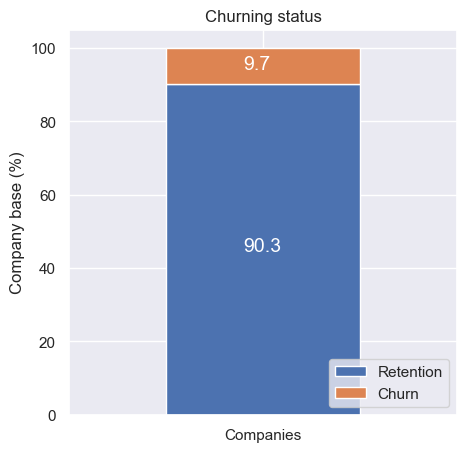

In [47]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of total customers have churned and 90% of customers have not churned, it is imbalenced dataset, so in the modeling process, we need to handel this problem.

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

## Sale Channels

Sale channels can play an important role in customer's rentation or churn. Some strong sale channels can create quality and loyal customers.



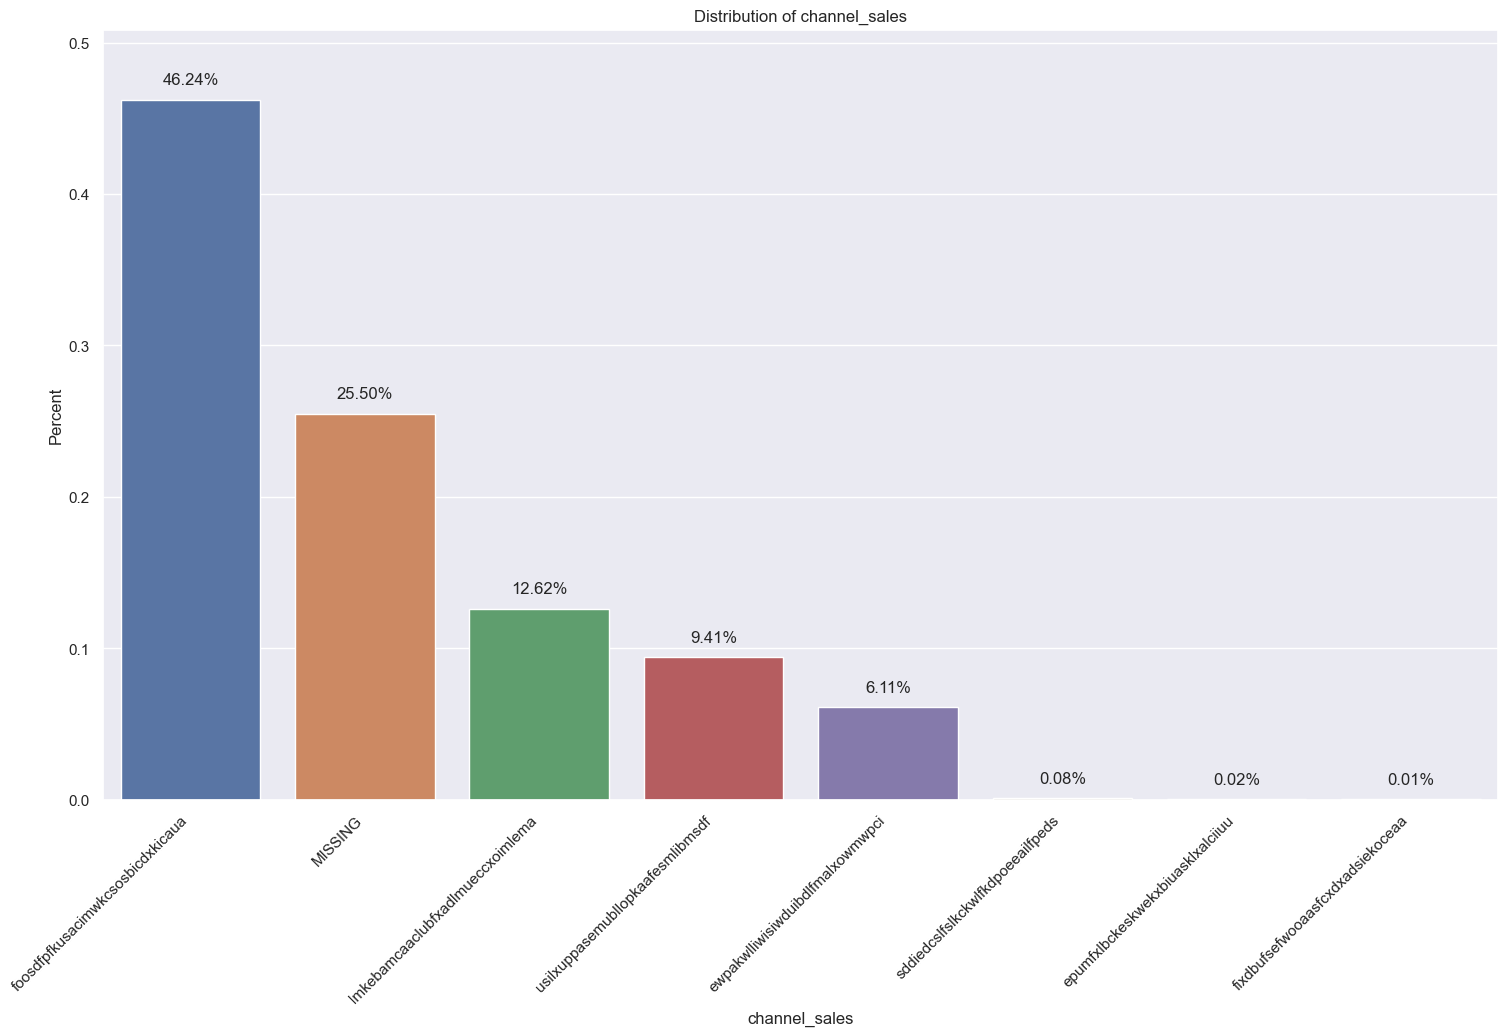

In [48]:
plot_label_bar_chart(df=client_df, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01, rotation = 45)

The most frequently occurring sales channel is `first column`, whereas `the last 3 column` are very infrequent. Suprisingly, `MISSING` column is on the second highest.

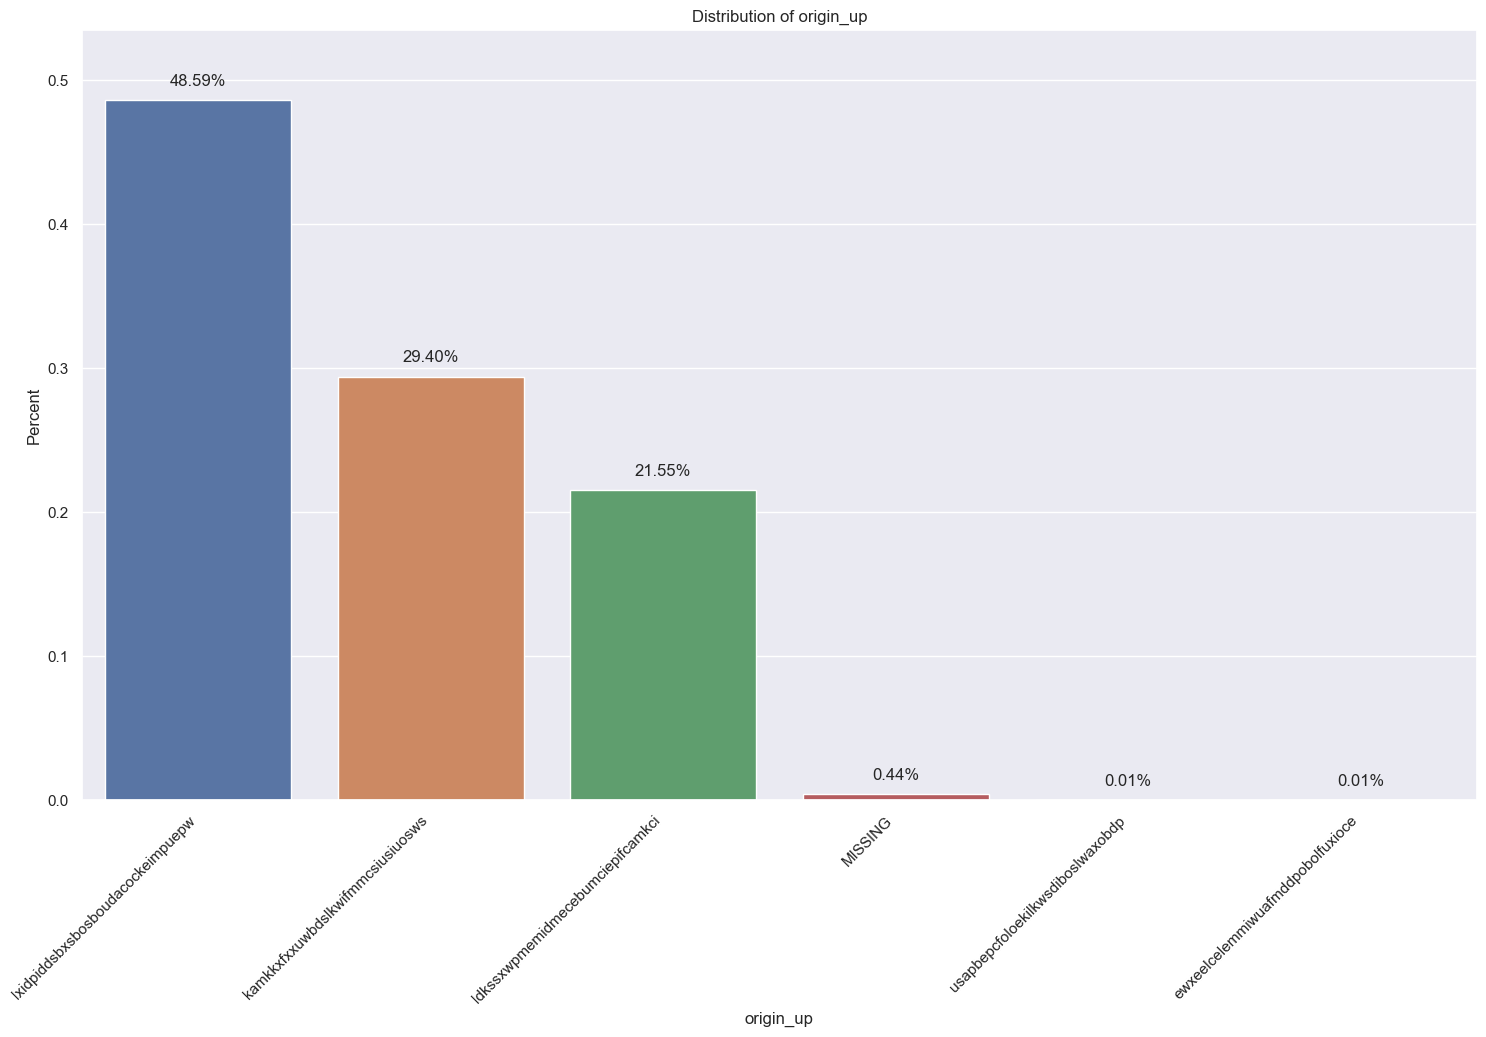

In [49]:
plot_label_bar_chart(df=client_df, target_variable='origin_up', if_sort=True, gap_label_bar=0.01, rotation=45)

The majority of customers subscribed to `first column` which is `48.59%` as their first electricity campaign, while only a small number of customers subscribed to `the last 3 columns` which is `0.44%, 0.01%, and 0.01%` respectively, campaigns initially.

In [50]:
channel=client_df[['id', 'channel_sales', 'churn']]
channel=channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [51]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

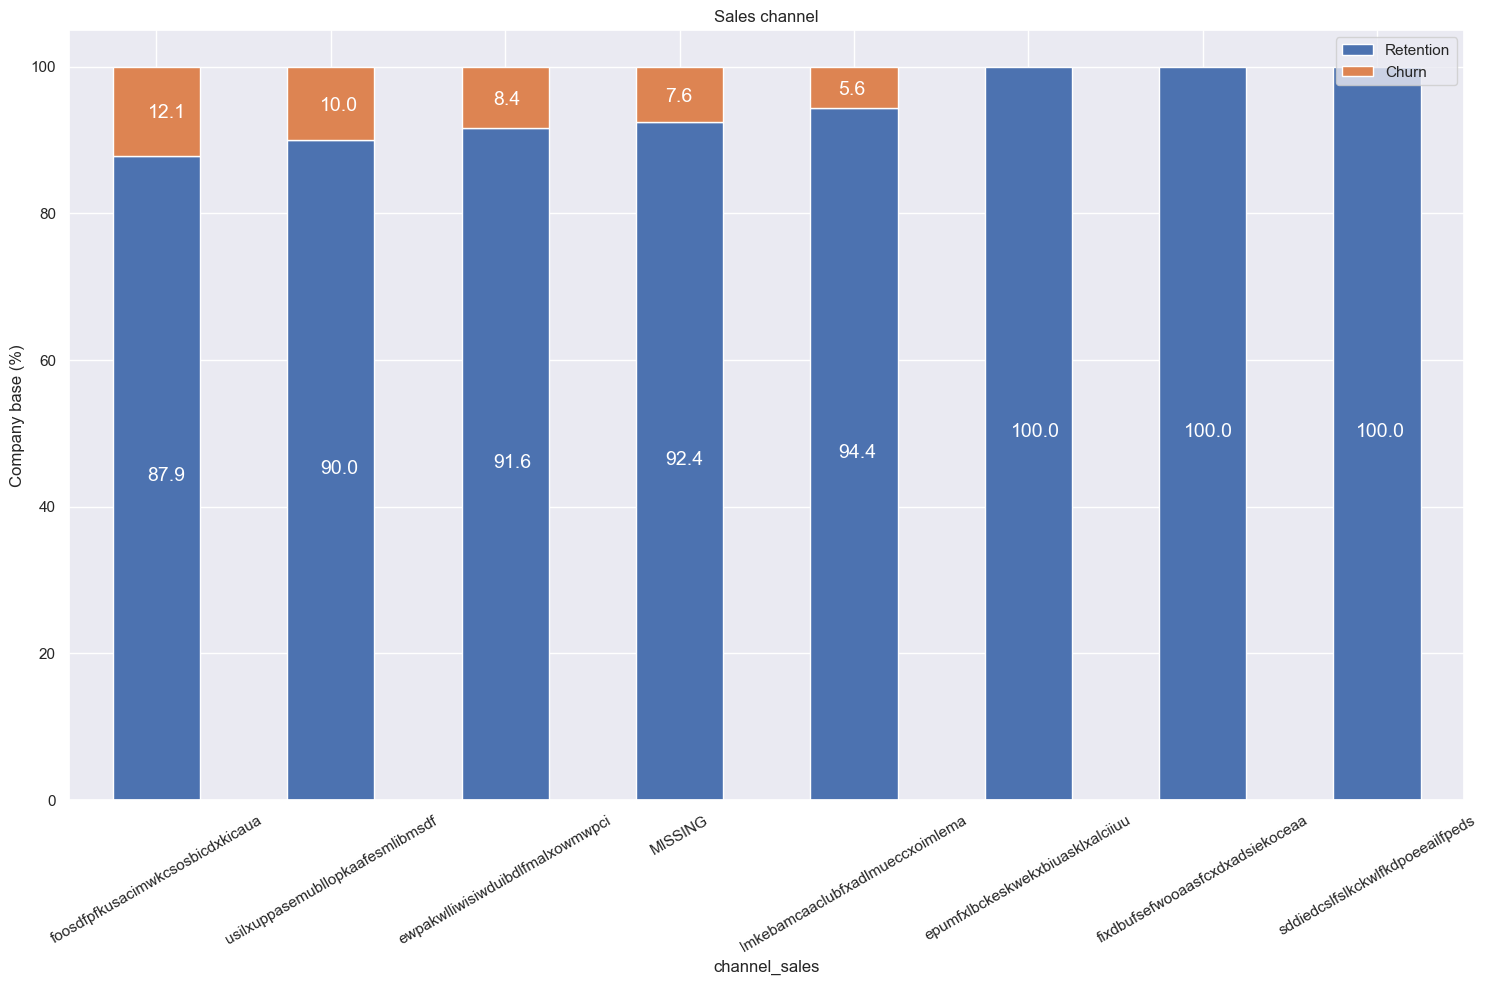

In [52]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

There are 5 Sales Channels having churn rate, which varies between  `5.6% to 12.1%`, with rare channels exclude. 

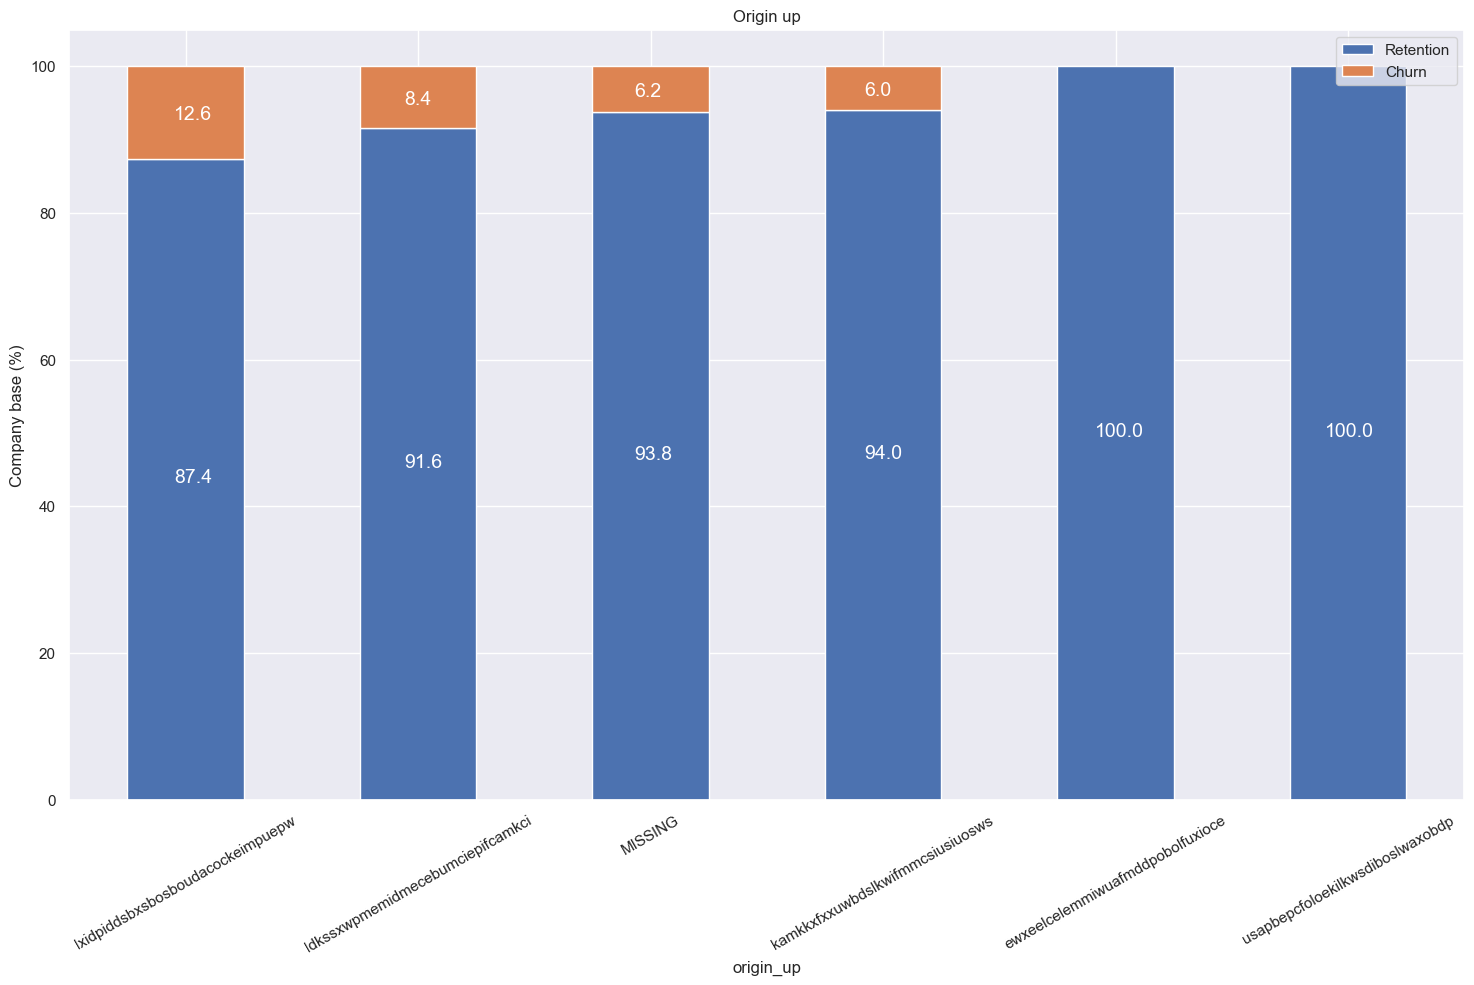

In [56]:
channel = client_df[['id', 'origin_up', 'churn']]
channel = channel.groupby([channel['origin_up'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Origin up', rot_=30)

The churning percentage of customers varies between `6.0% to 12.6%` for different types of electric campaigns except for `the 2 last columns`. 

## Consumption

Now, we will see the consumption of customers during the last month and 12 months againt the churn. Because this is a numeric - categorical comparison therefore we can use histogram distribution or box plot visualization. 

In [31]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

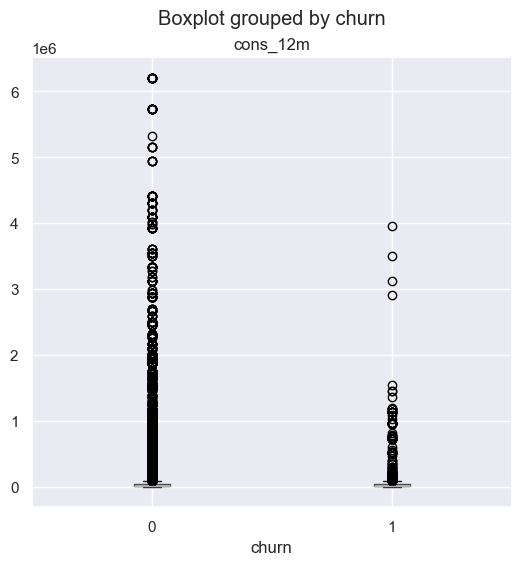

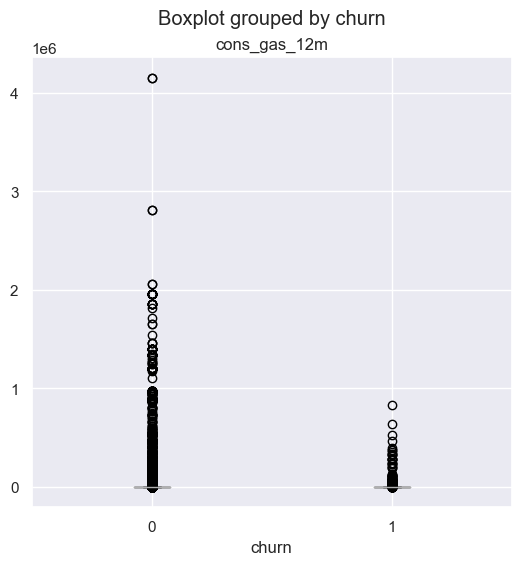

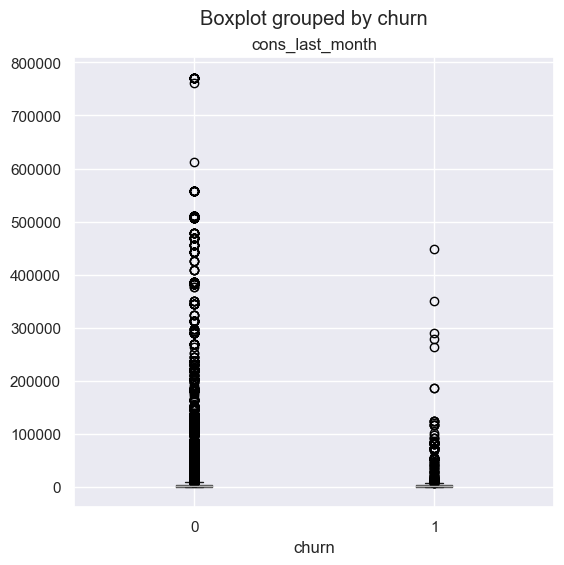

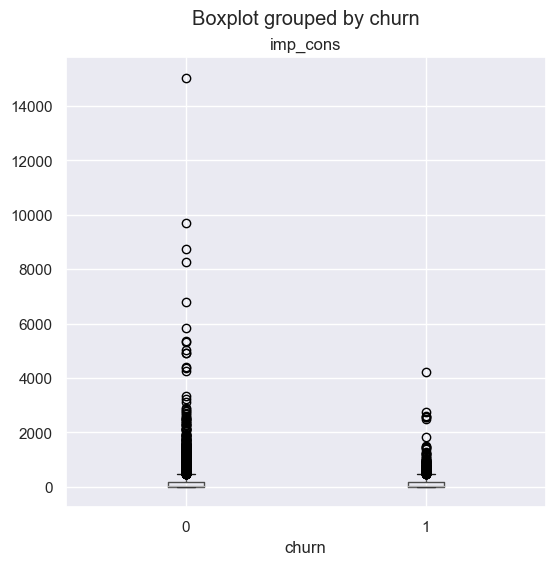

In [32]:
for col in consumption:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

We will create a plot_distribution function to see the spread and skewness of the data. 

In [33]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [34]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

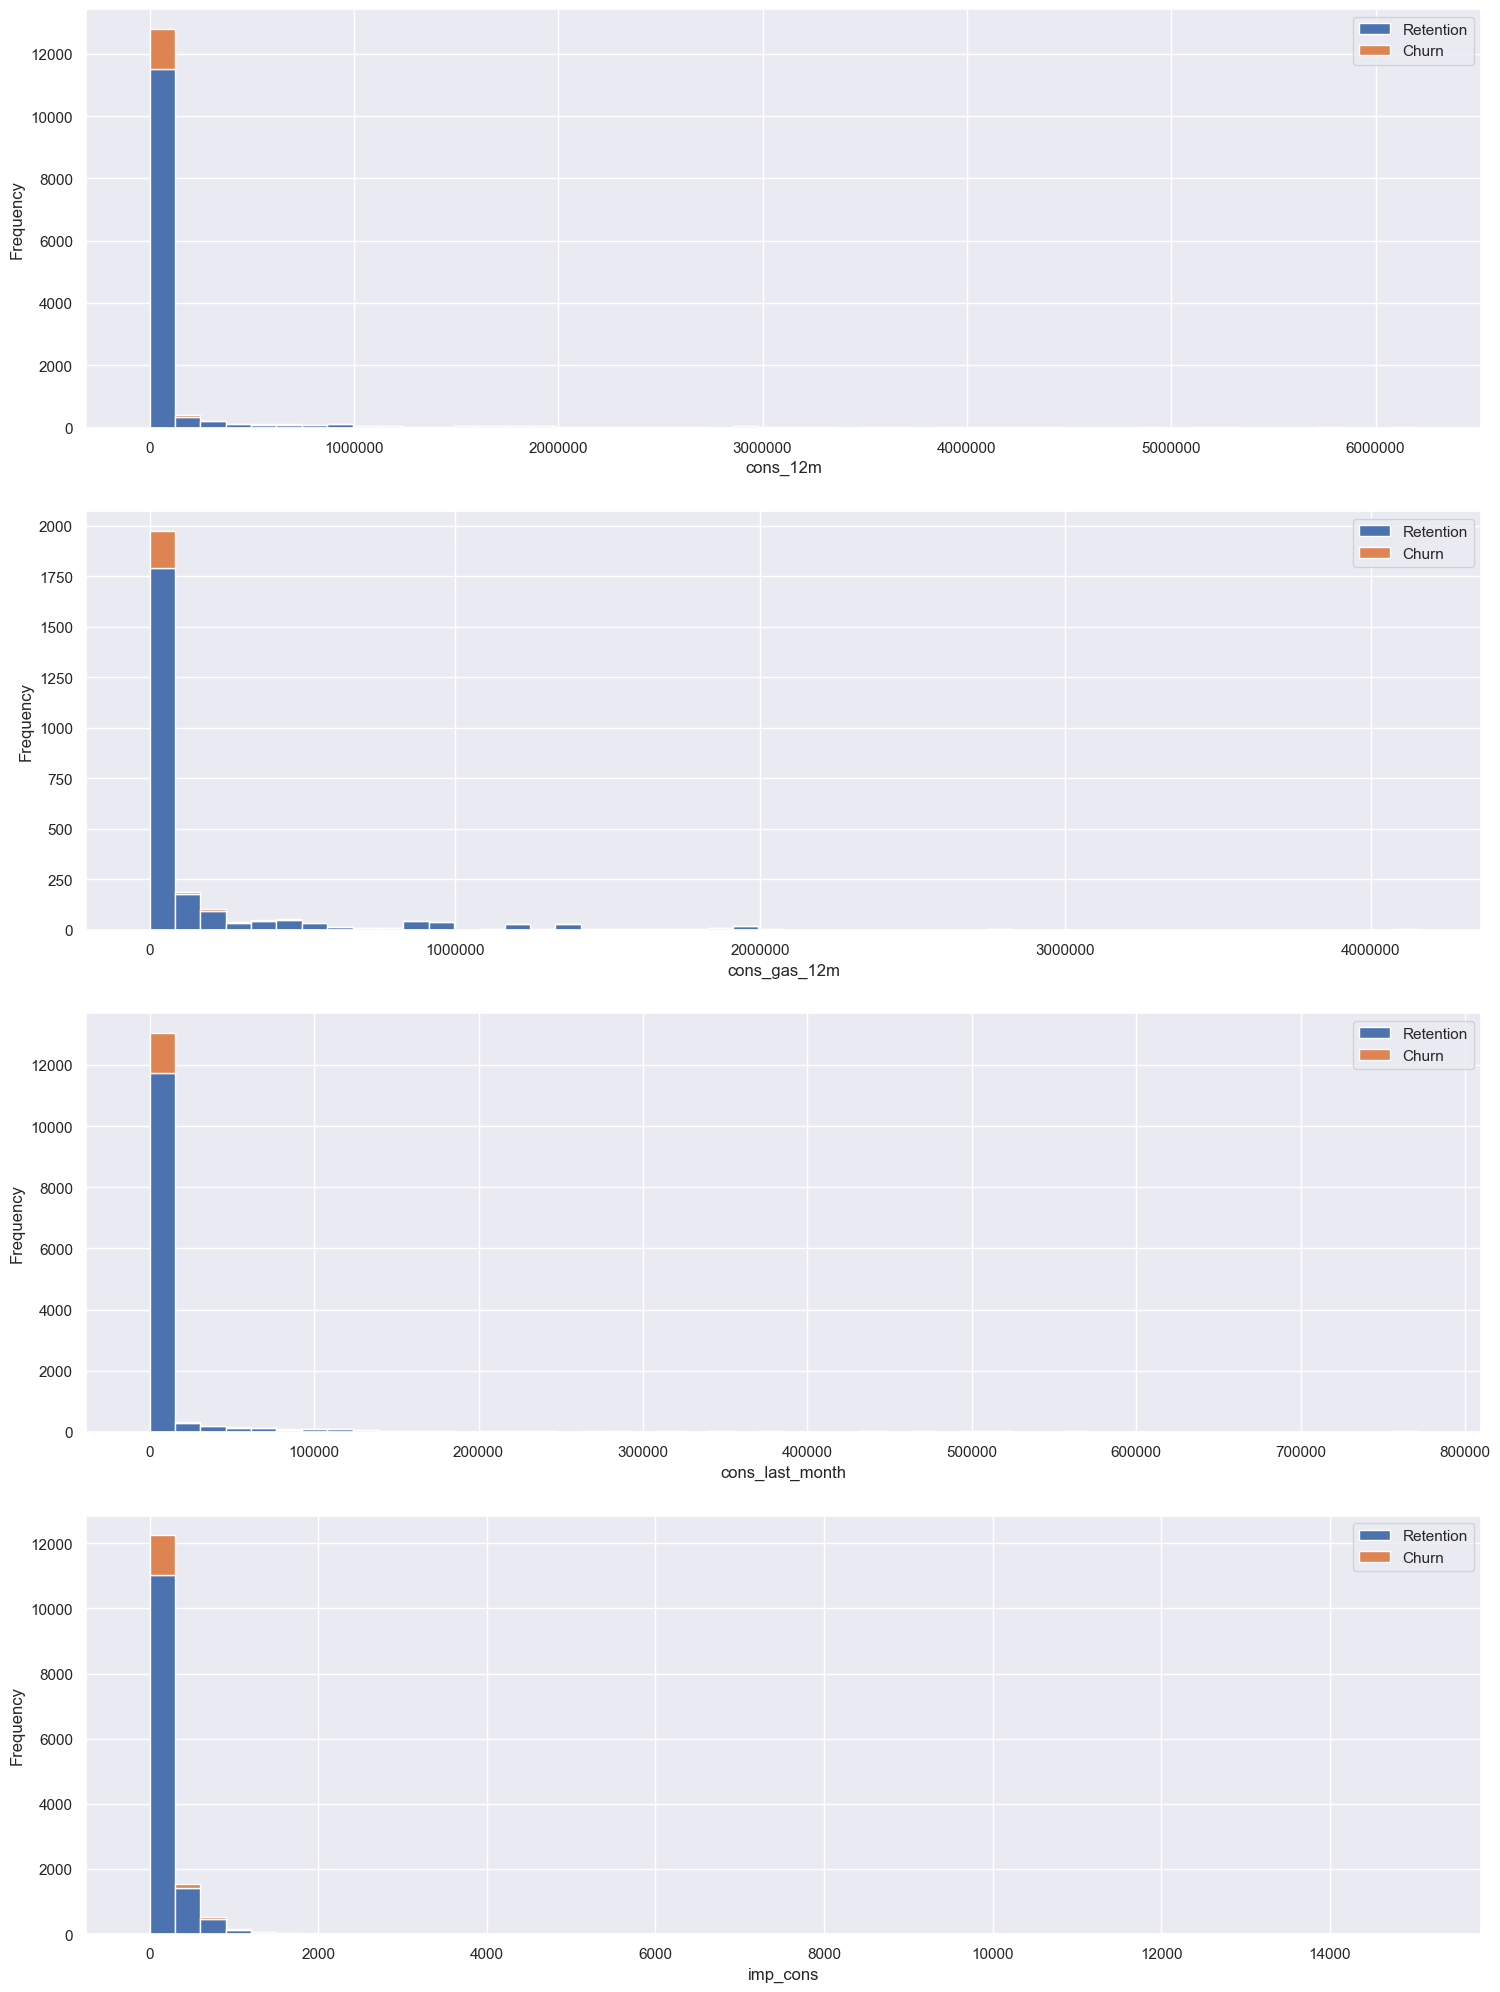

In [37]:
fig, axs = plt.subplots(nrows=4,figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

- We can say that the consumption data is positively skewed with long right tail, indicating the presense of outliers at the upper end of the distribution.The use of a histogram plot can help uncover anomalies and their values, as well as reveal the degree of symmetry and skewness in the data.
- However, to further investigate the outliers and skewness of data, we shall use boxplot to sketch that. 

## Price

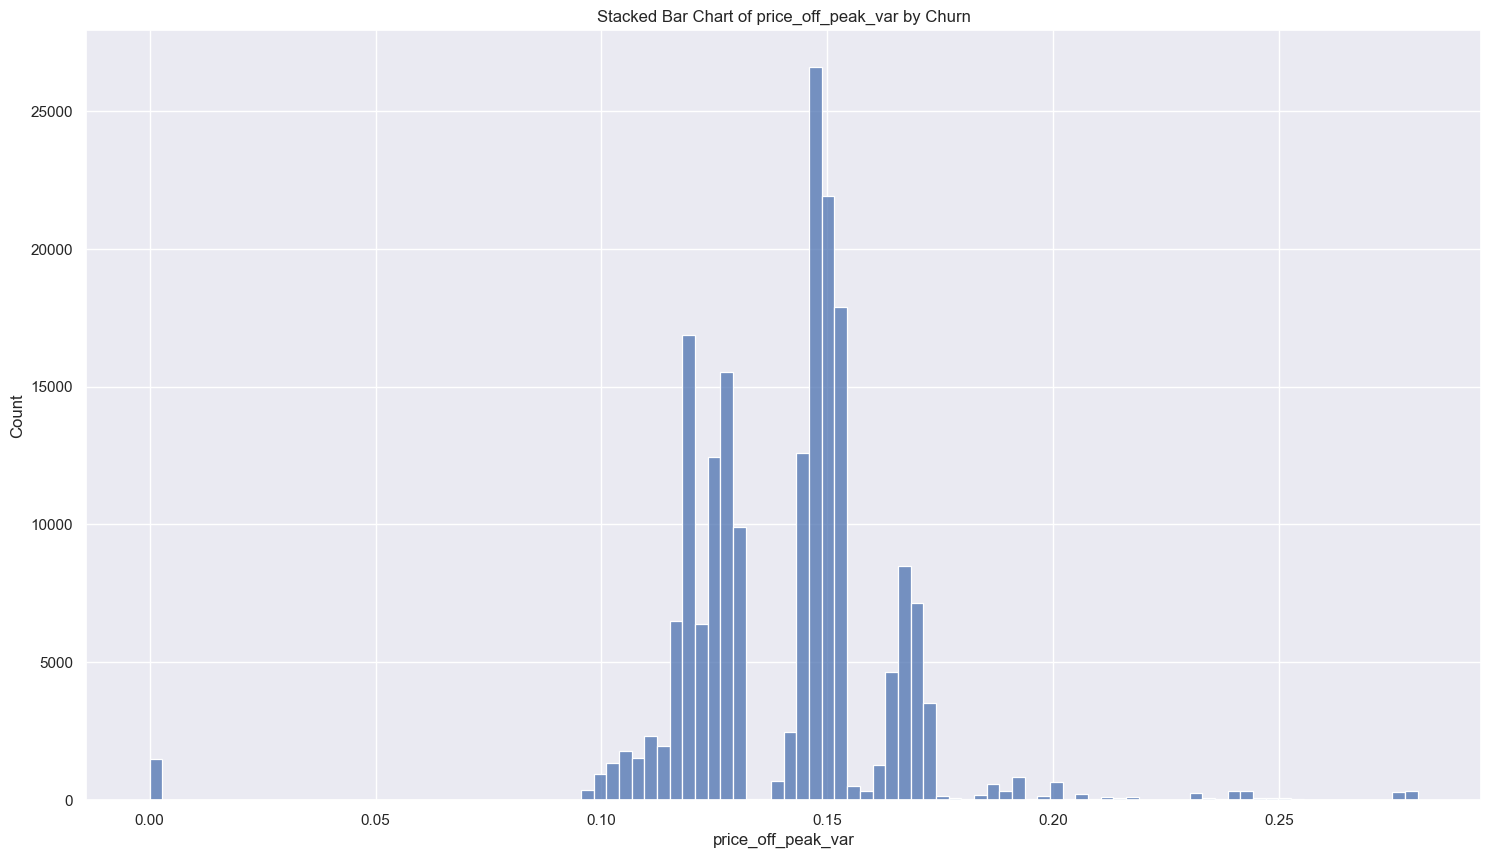

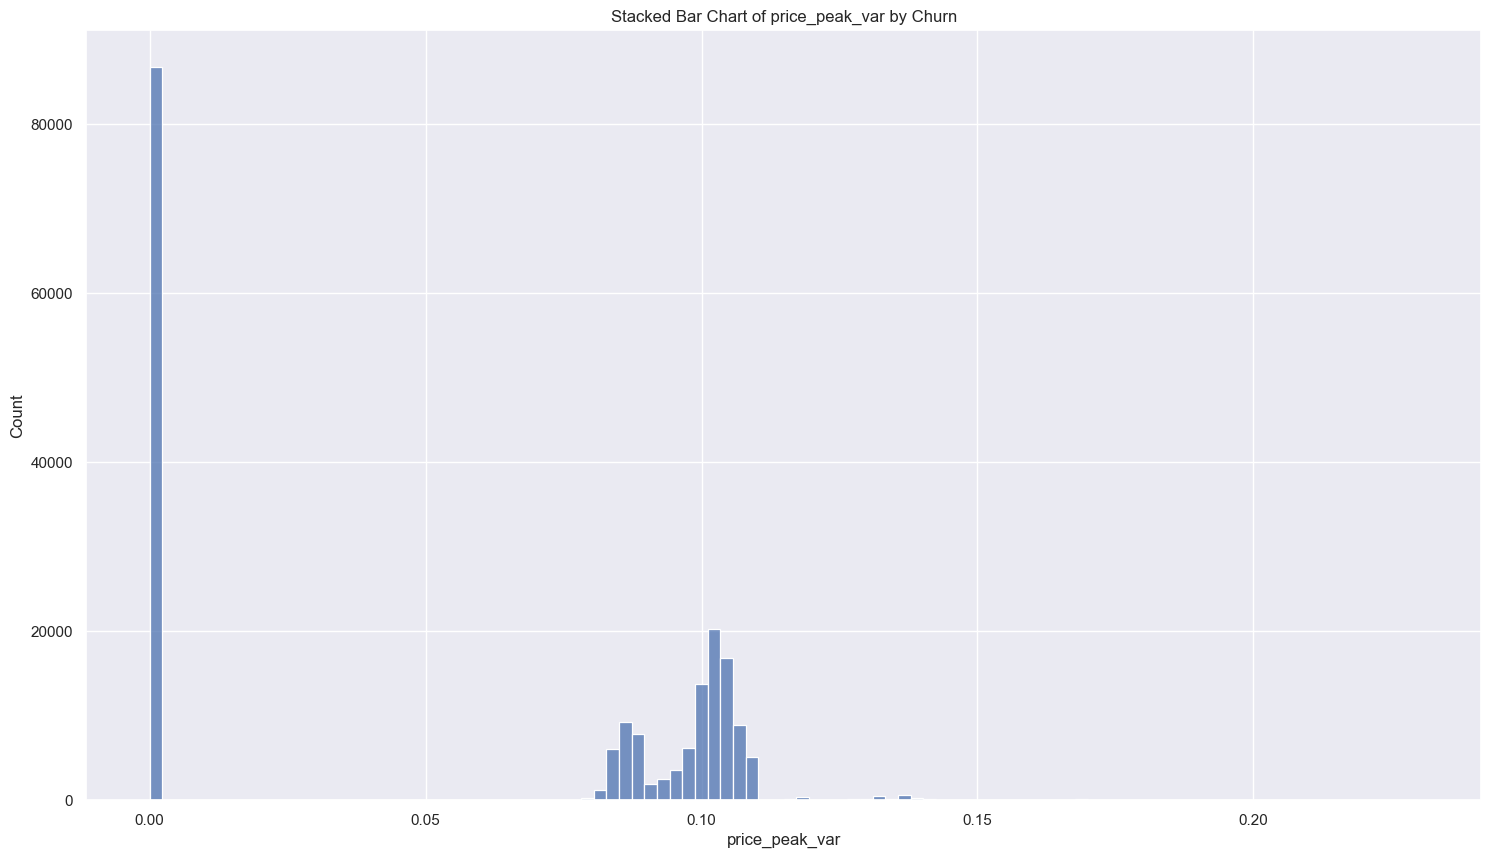

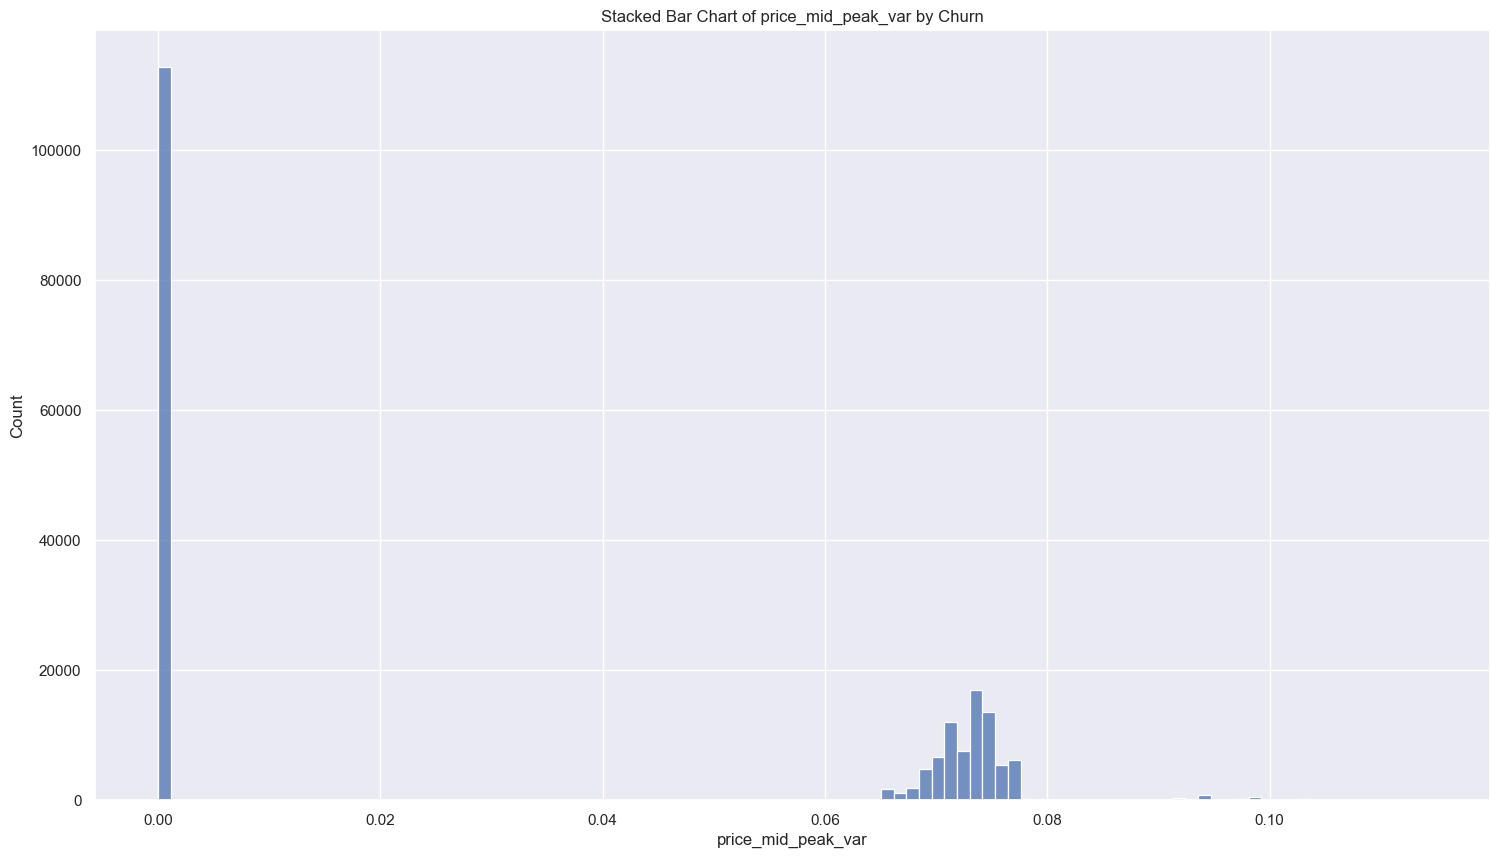

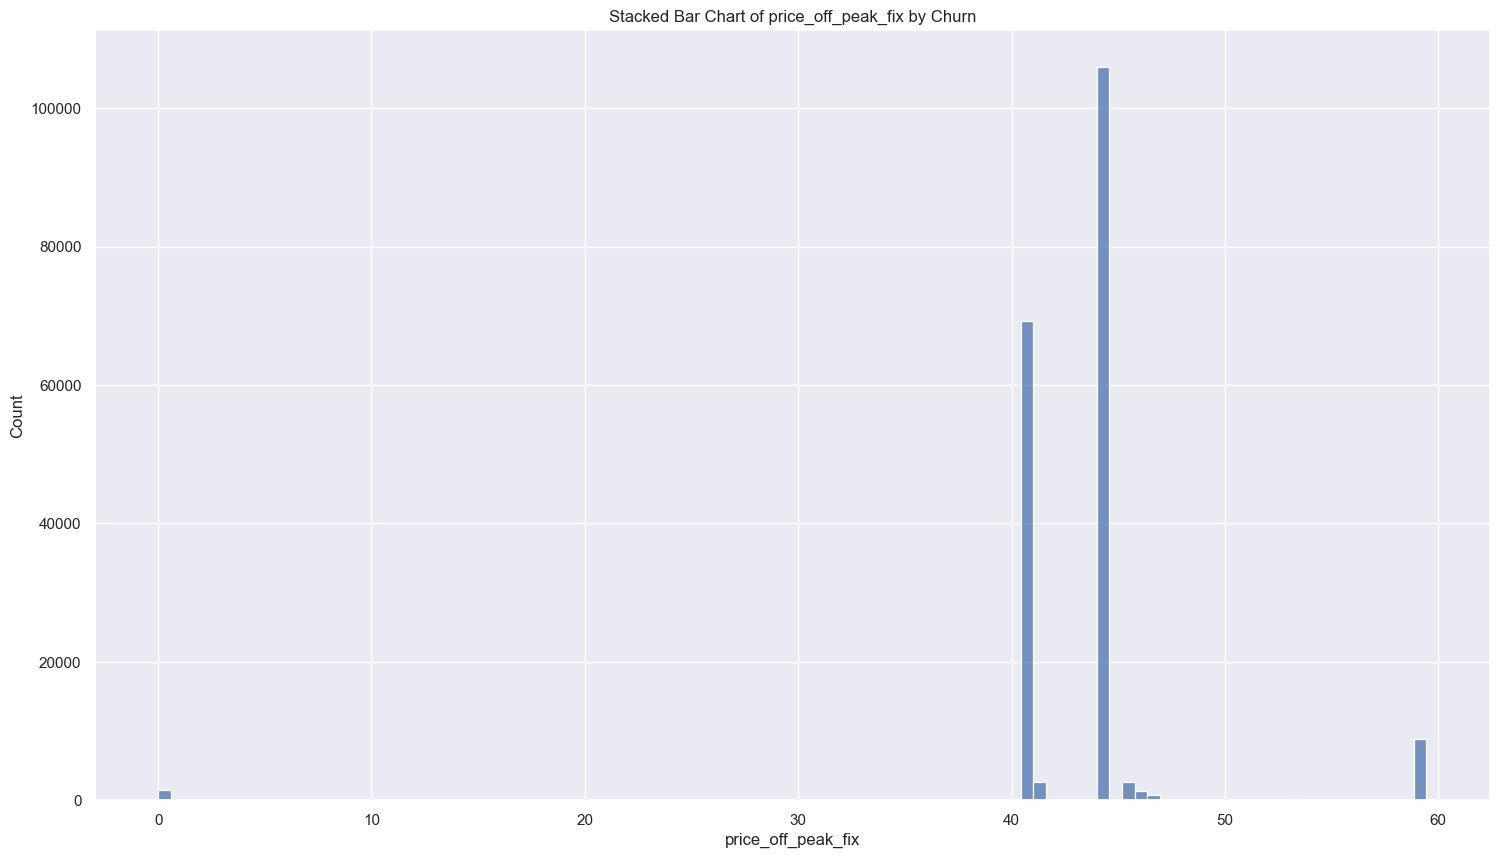

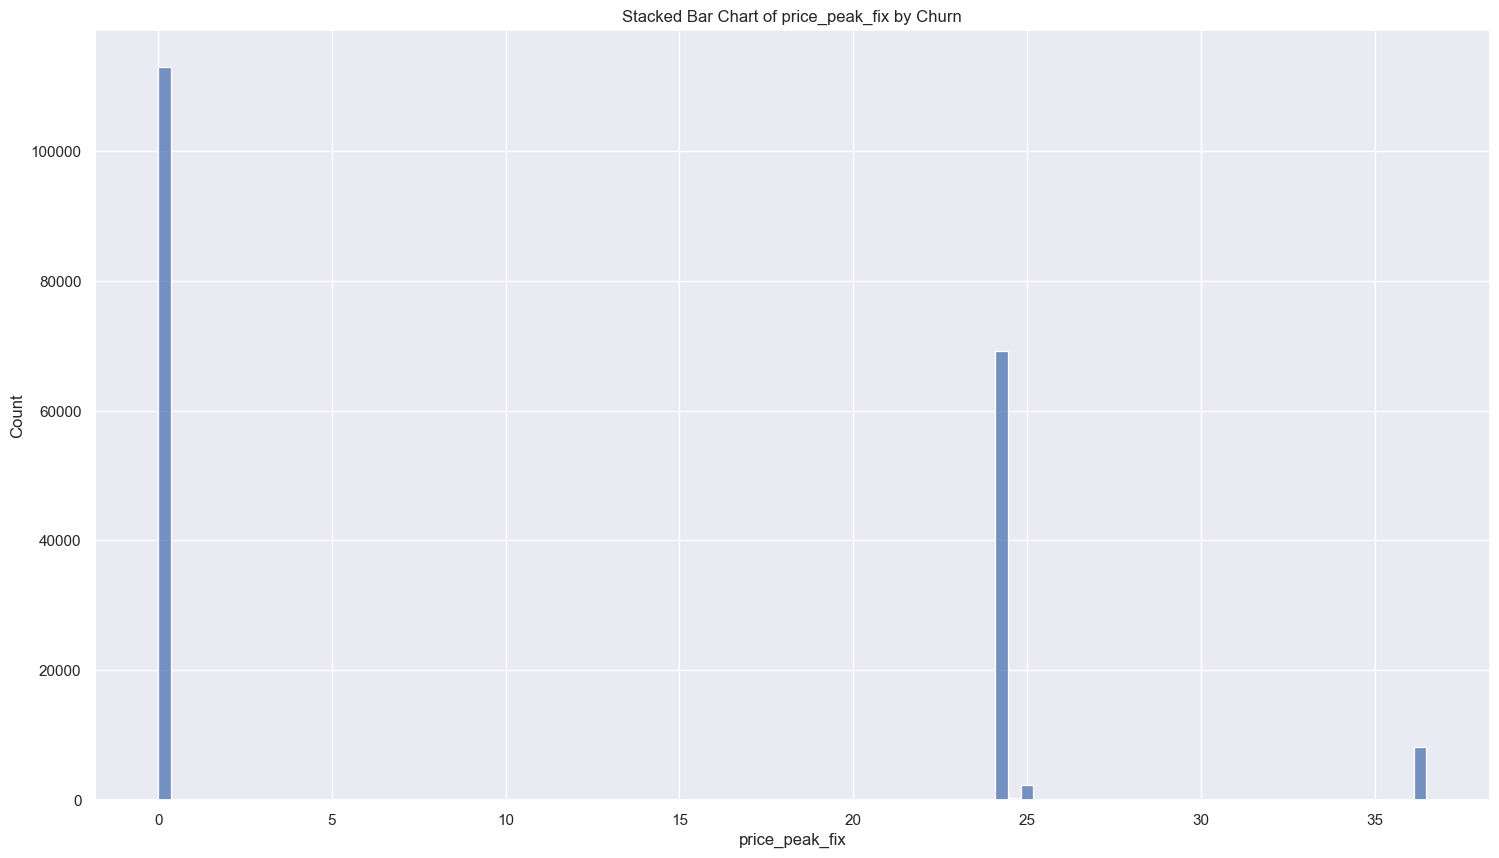

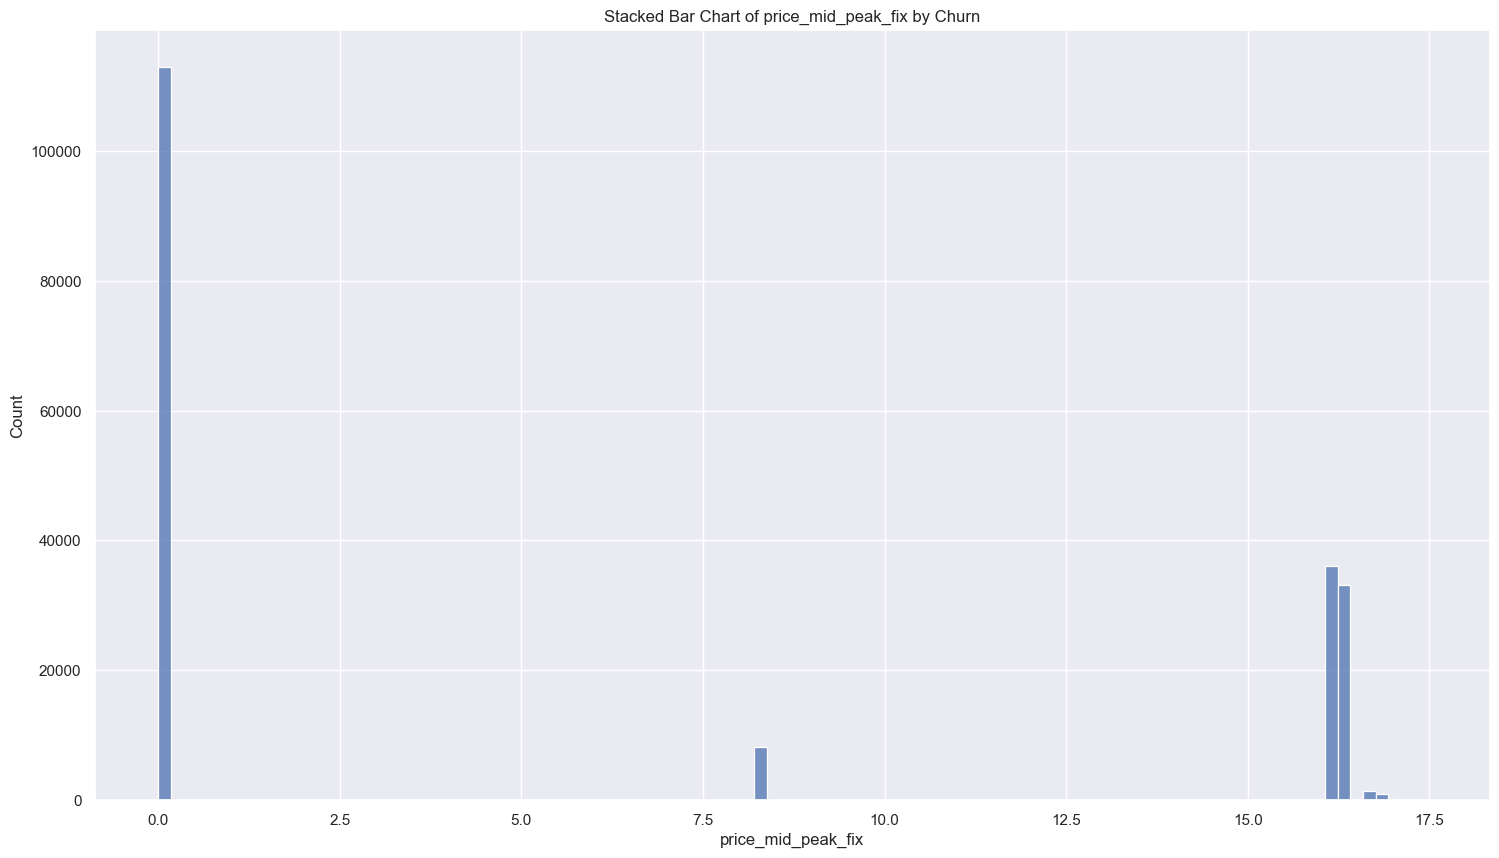

In [61]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

After examining the peak and off-peak prices, it became apparent that there were numerous occurrences of zero peak prices and mid-peak prices, while very few instances of zero off-peak prices were observed. This indicates that the company's pricing approach might be designed to motivate customers to consume energy during off-peak periods. It is plausible that the company offers discounts or special rates during off-peak hours to encourage customers to shift their energy consumption away from peak times. Conducting a more comprehensive analysis of customer behavior and consumption patterns during peak and off-peak periods could provide further insights into this observation and help shape future pricing strategies.

## Forecast

In [38]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

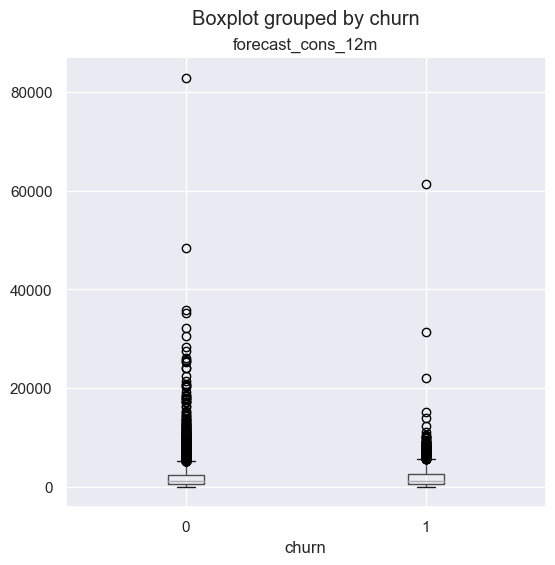

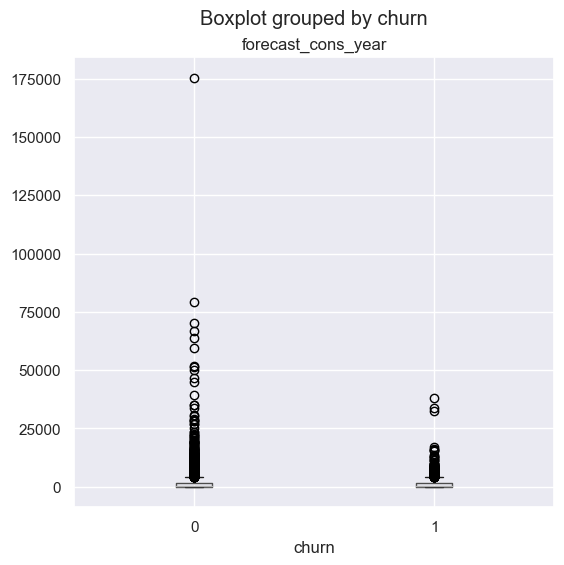

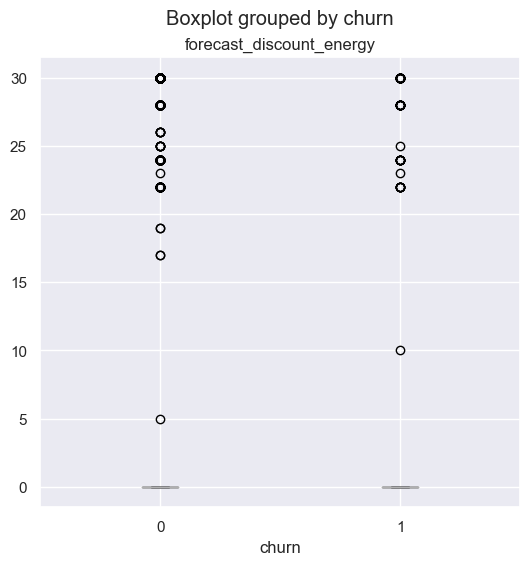

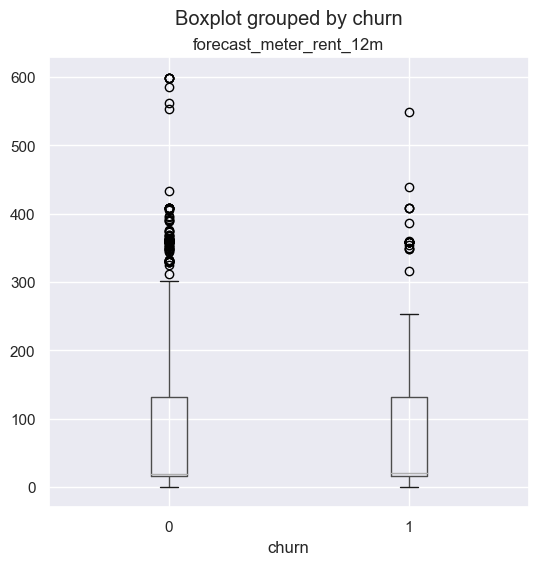

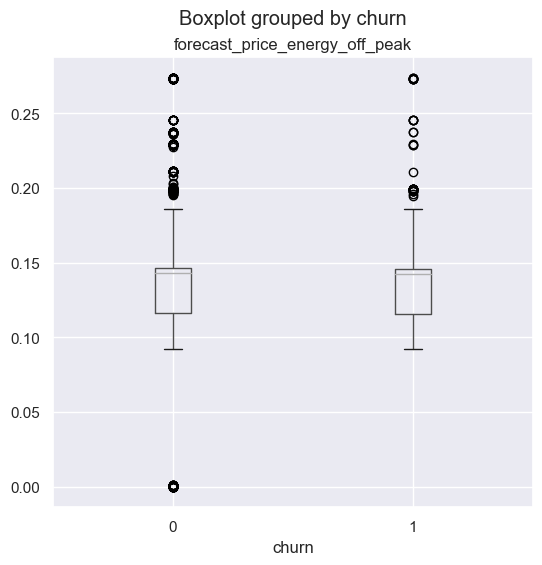

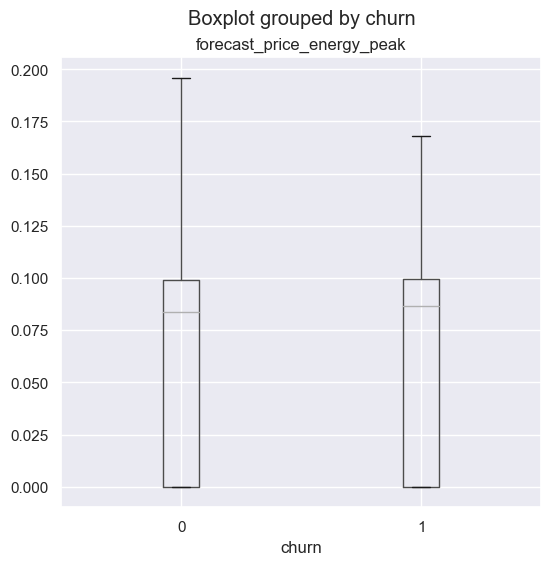

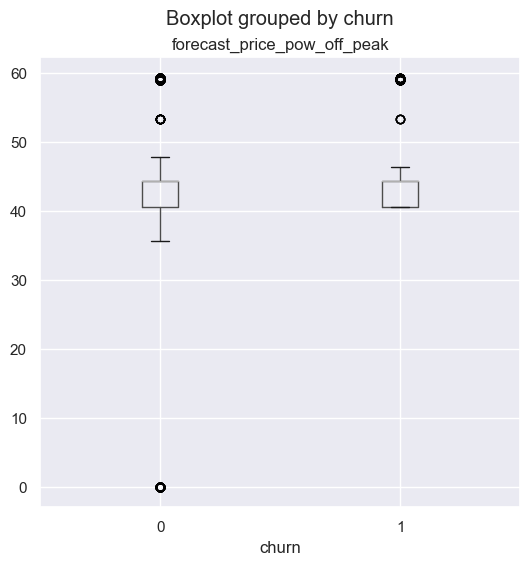

In [40]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

* The analysis demonstrates that several variables display a significant positive skewness, resulting in a prolonged right tail resembling the consumption patterns. To tackle this concern, we will implement specific adjustments in the subsequent procedure.

* Additionally, a majority of customers are projected to have a discount value of 0 for their current status.

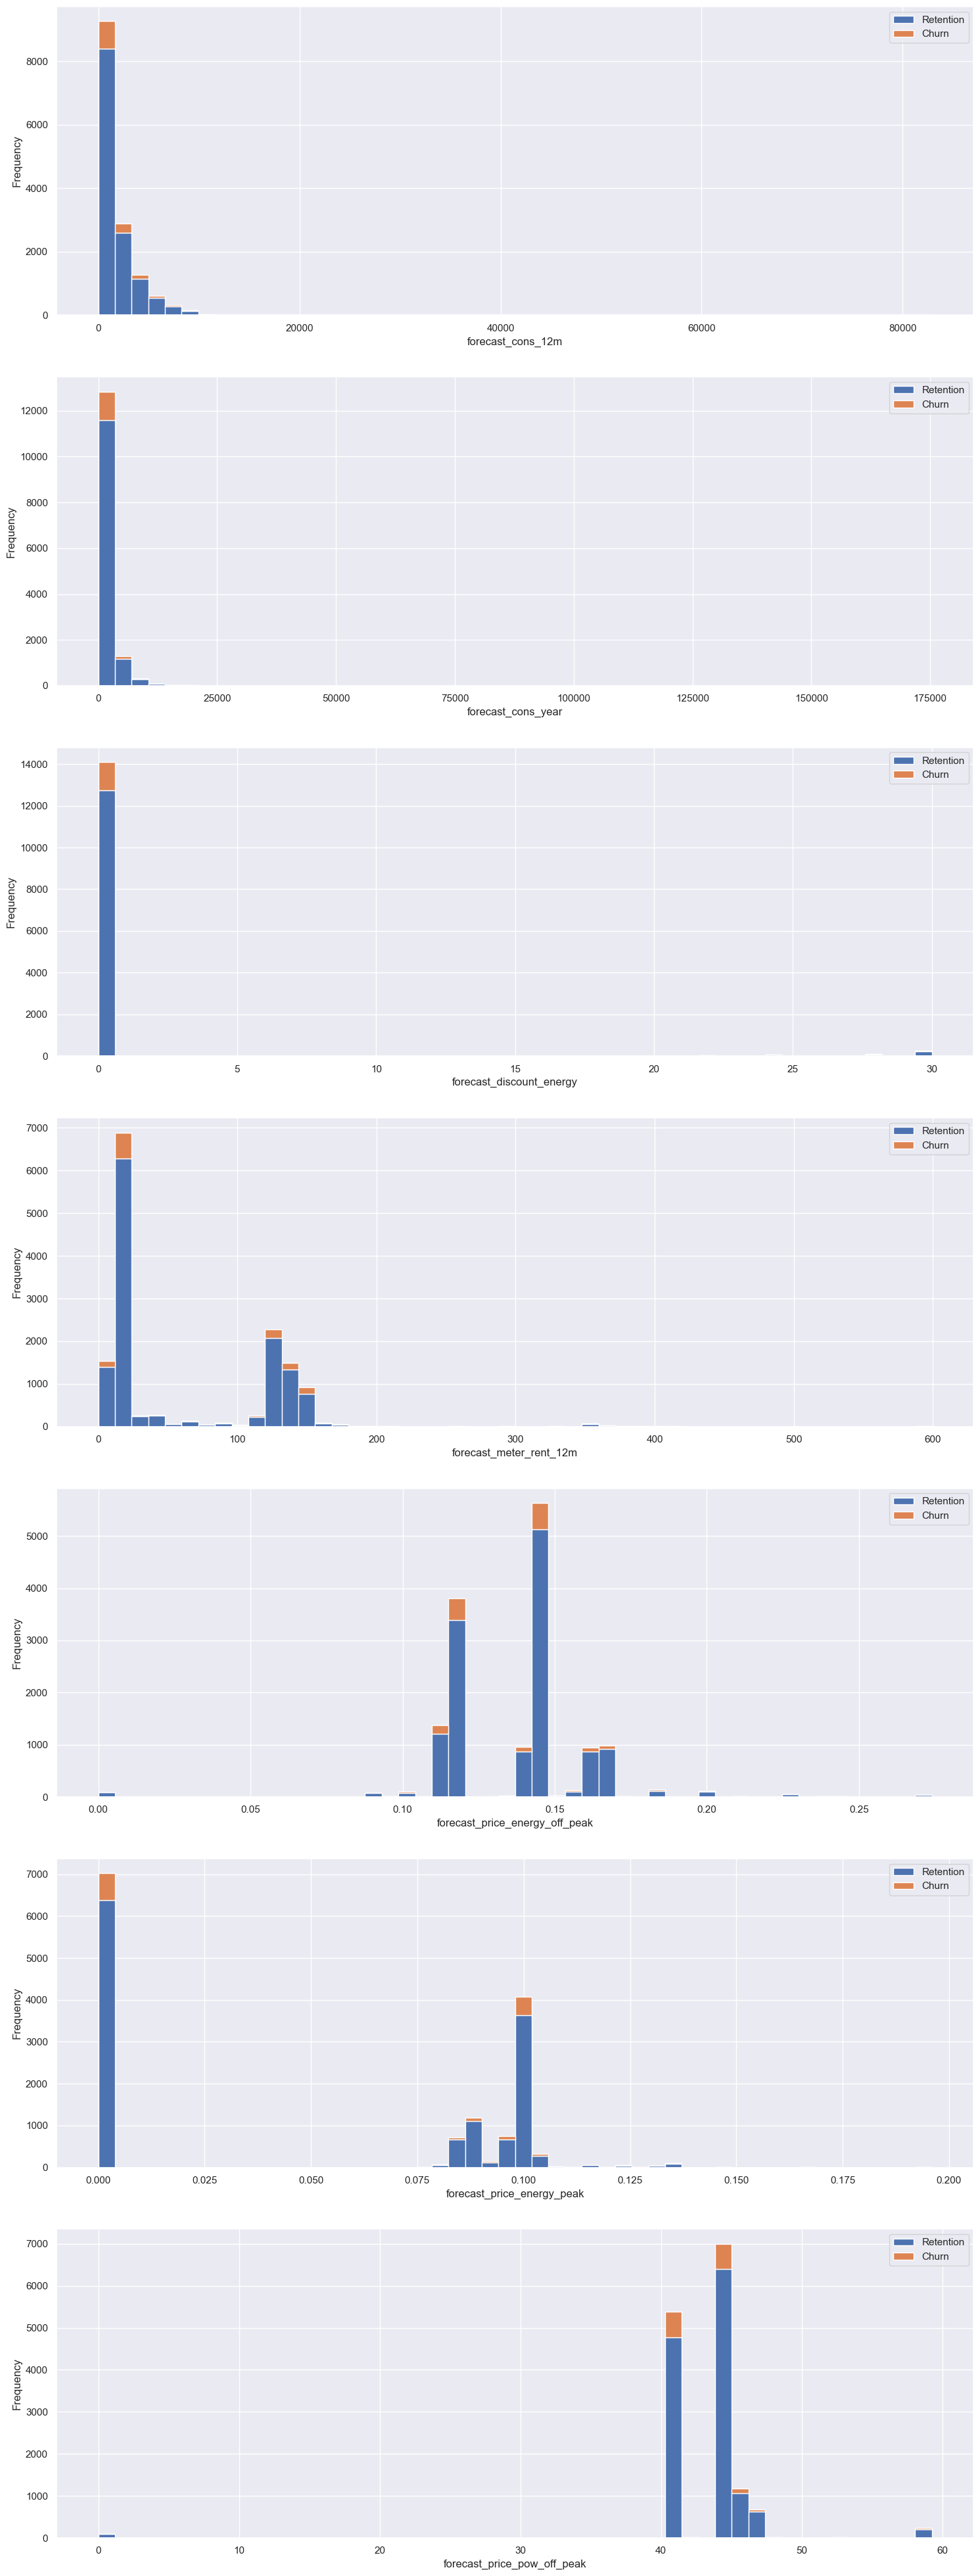

In [42]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

## Contract Length

In [57]:
# Convert datetime fearures to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[f] = pd.to_datetime(client_df[f])
    
client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year

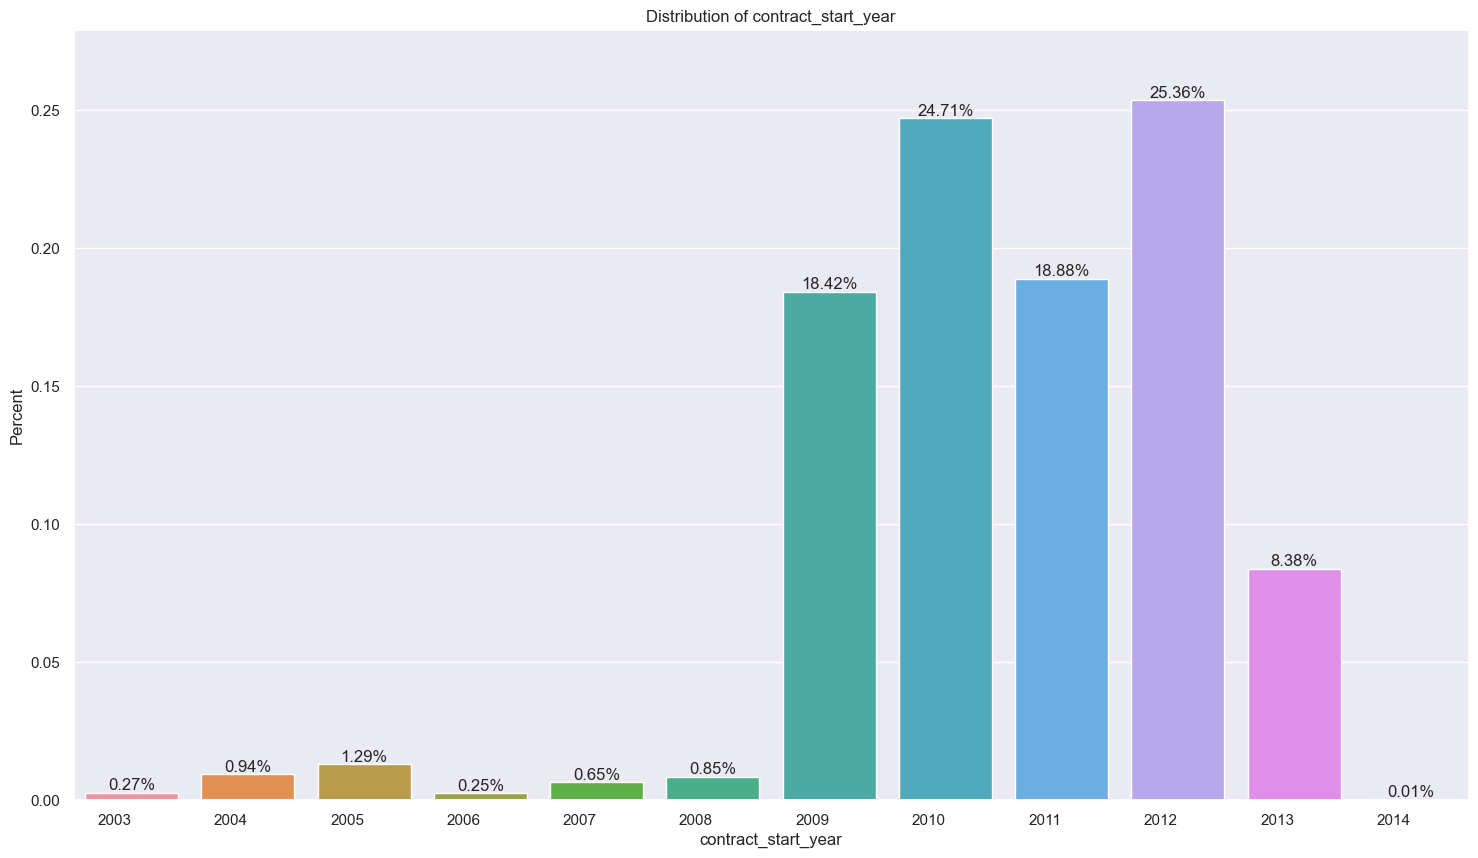

In [58]:
plot_label_bar_chart(df=client_df, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.001, figsize=(18,10))

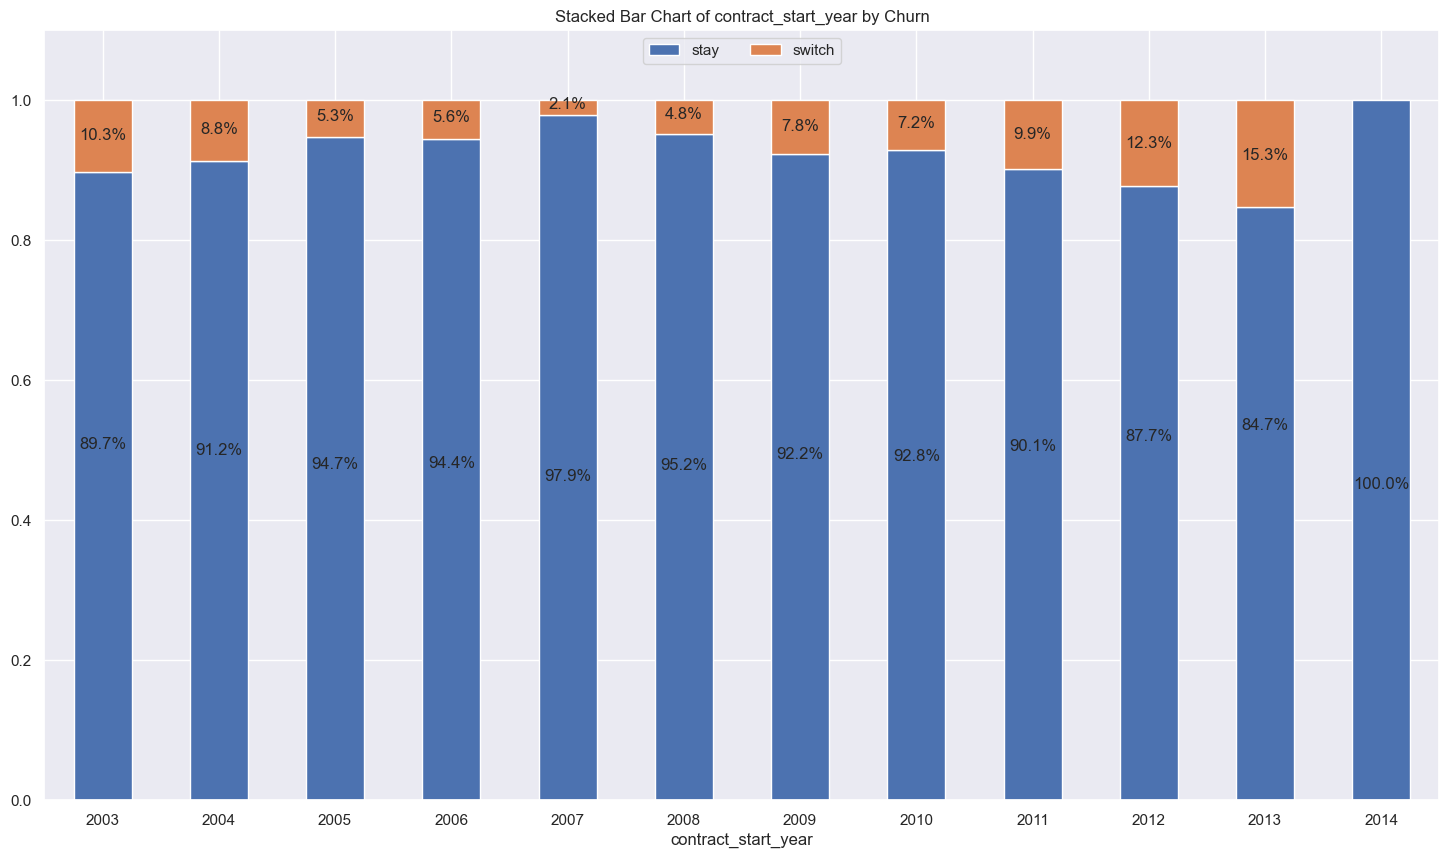

In [59]:
plot_label_with_churn_stacked(df=client_df, target_variable='contract_start_year', if_sort=False)

Most customers started their constracts from 2009 to 2013. Among thses customers, it seems that newer customers are more likely to switch to other providers. 

## Contract Type 

In [43]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

Text(0.5, 1.0, 'Contract Type')

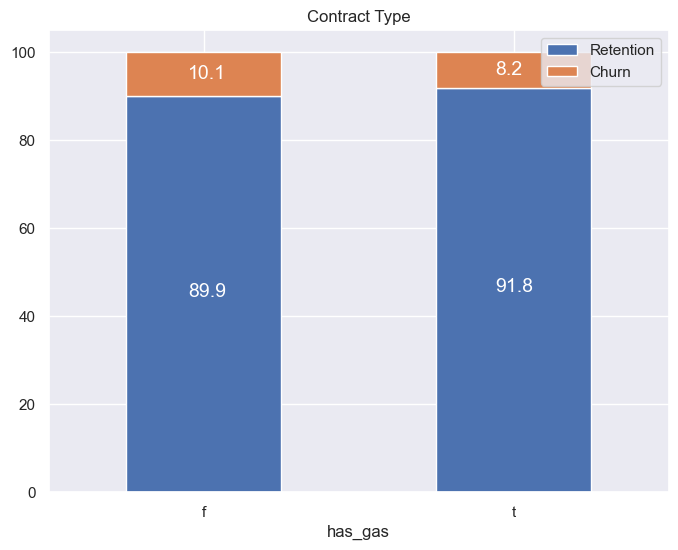

In [44]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

The churn rate for electricity clients is a little bit higher than electricty and gas clients. 

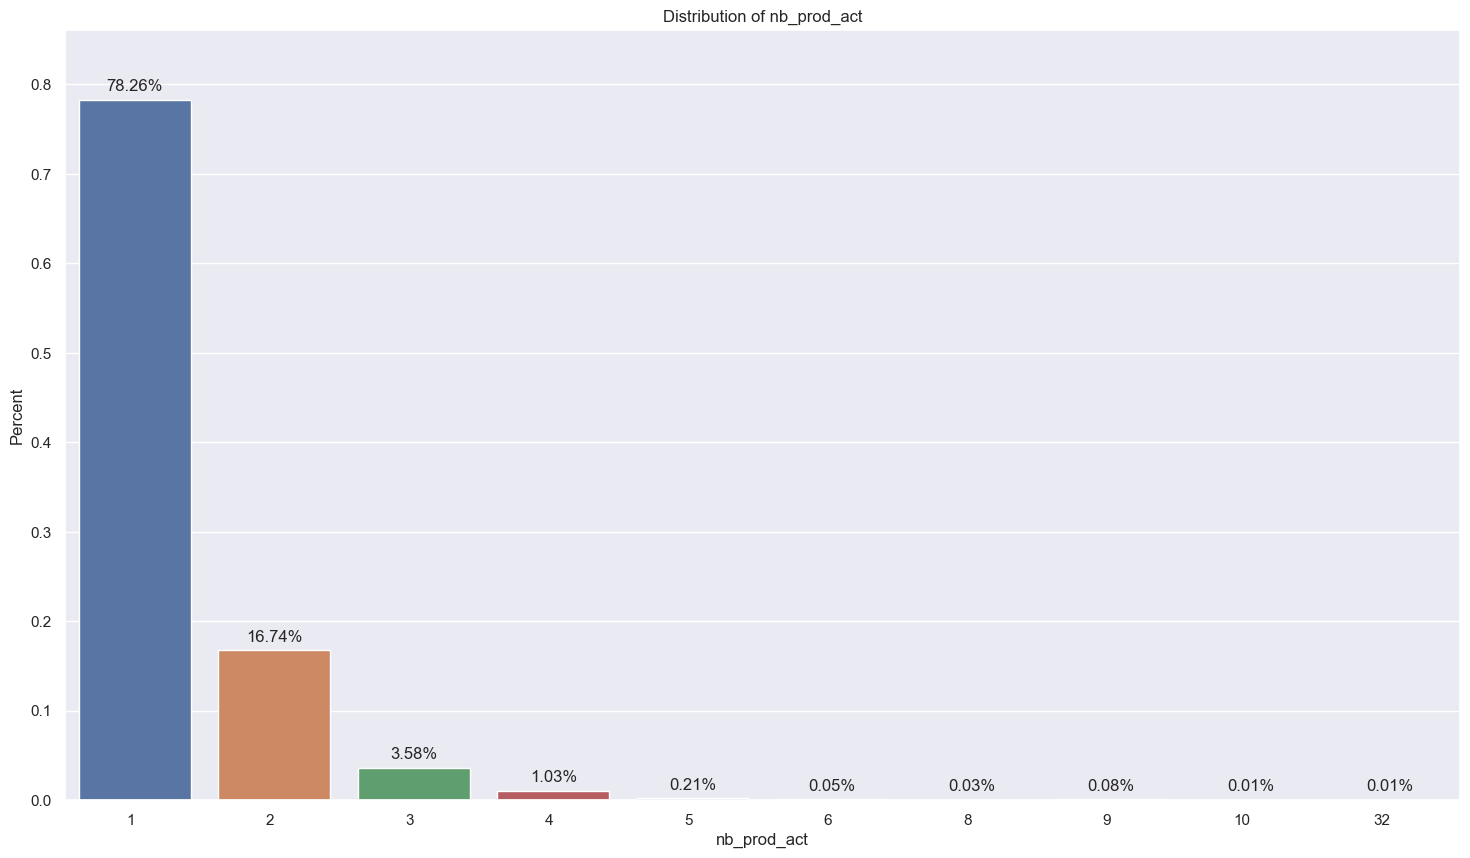

In [60]:
plot_label_bar_chart(df=client_df, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01)

Most customers have one or two products and service.

## Margins

In [62]:
margin = client_df[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

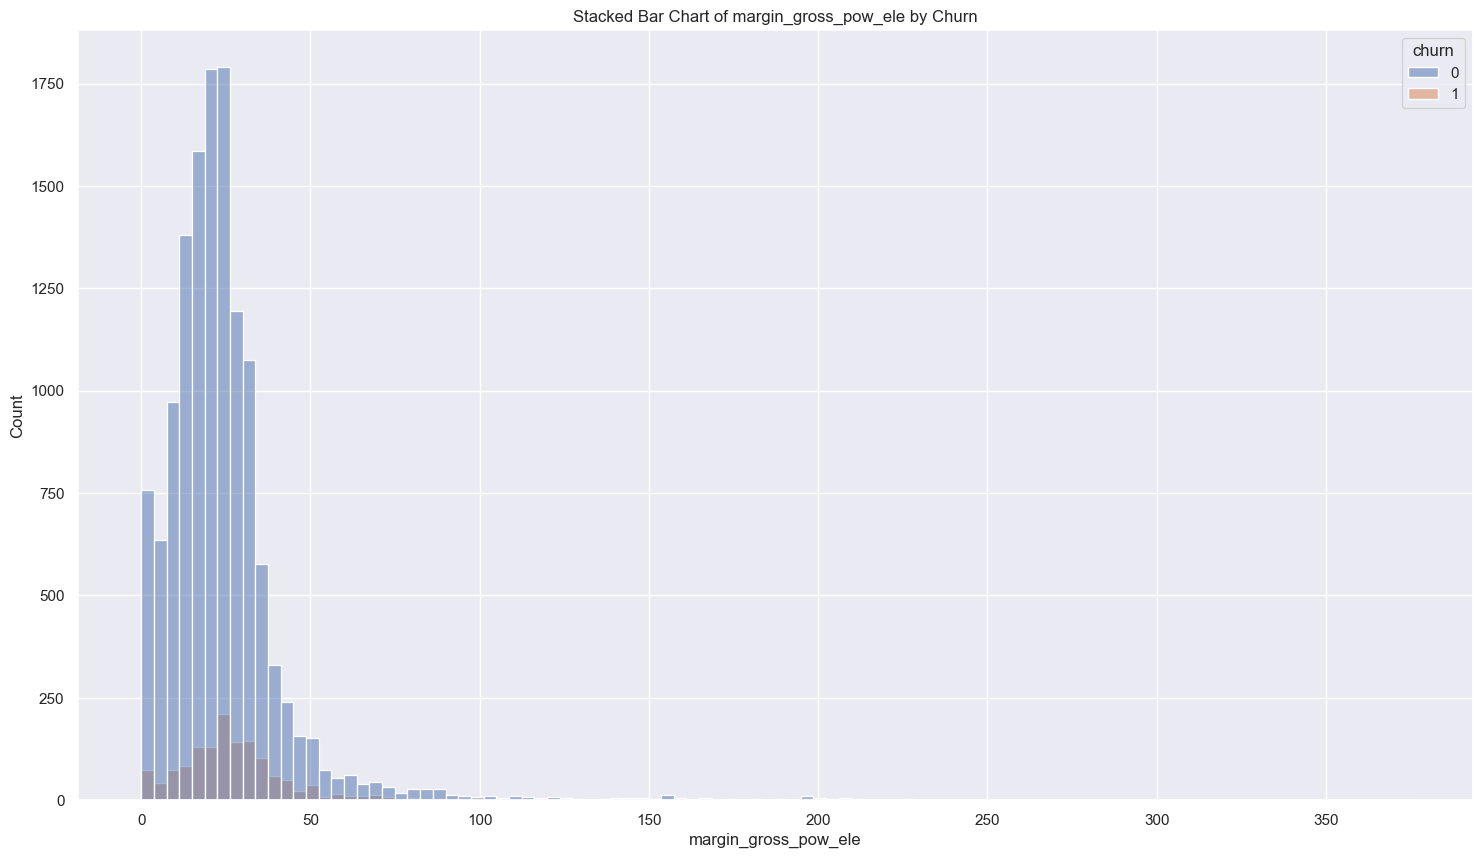

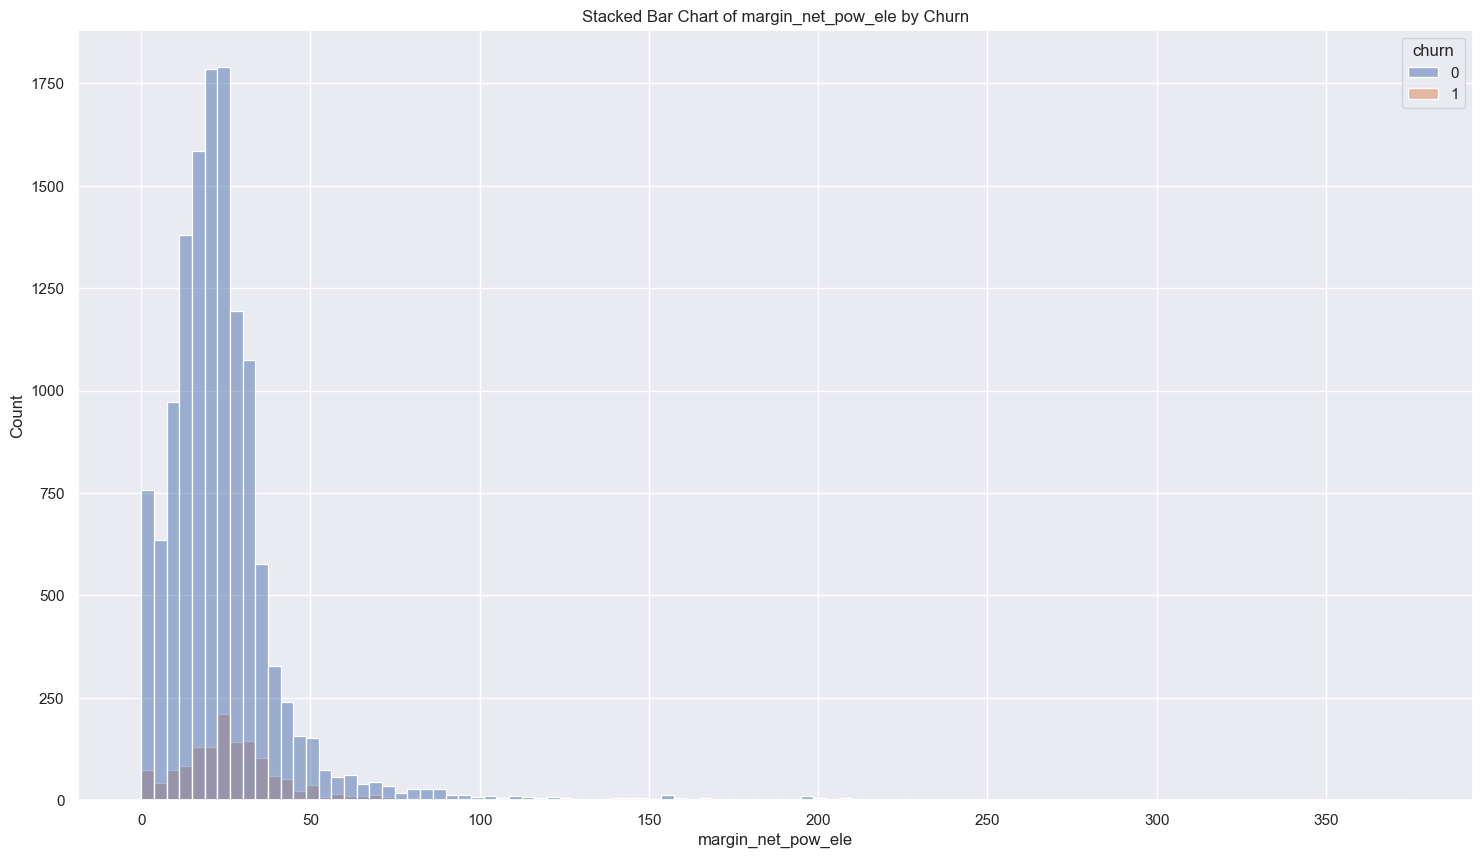

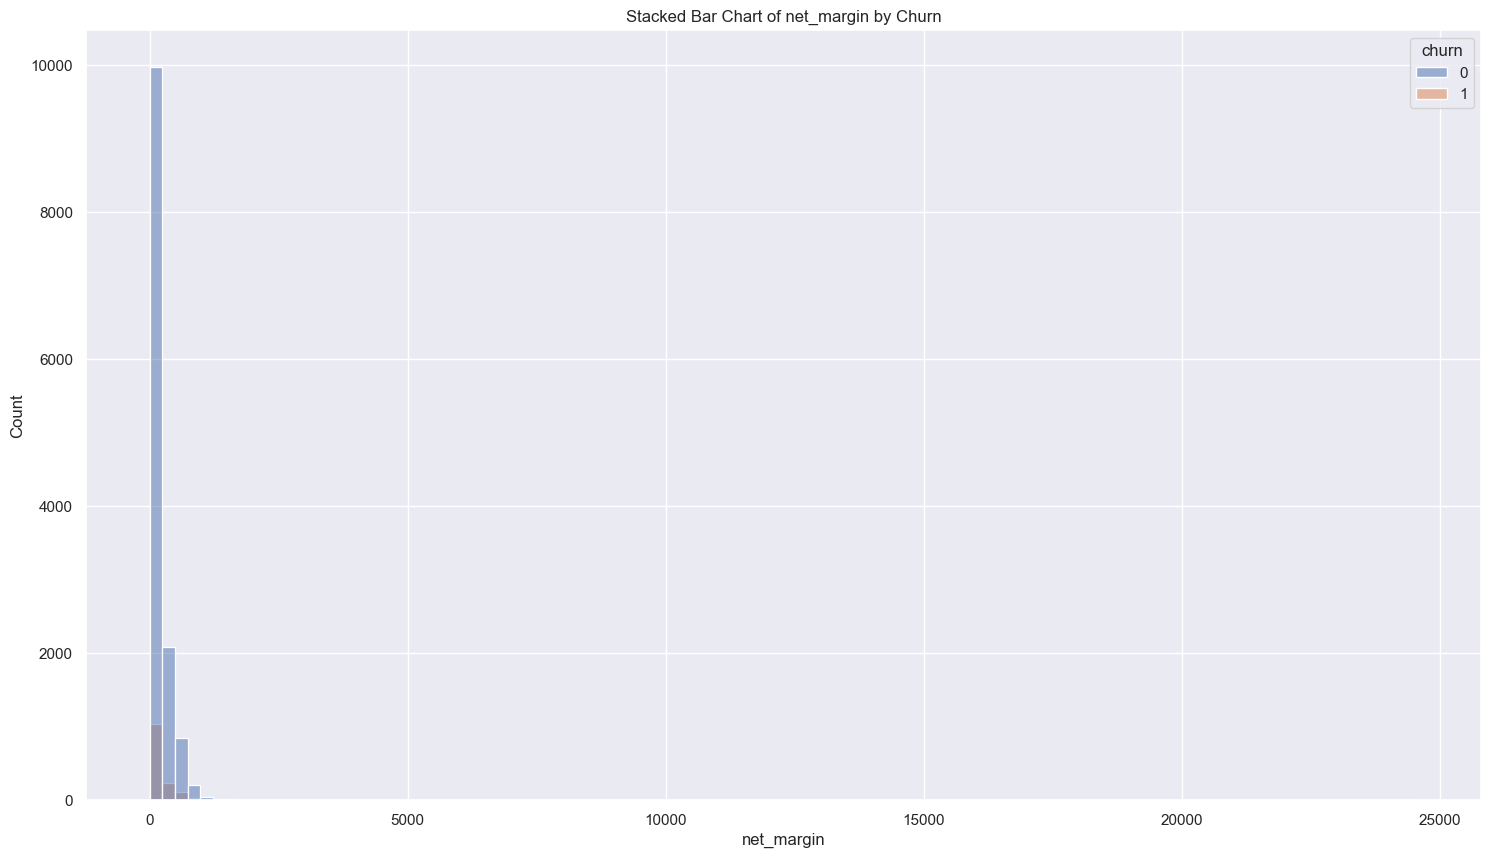

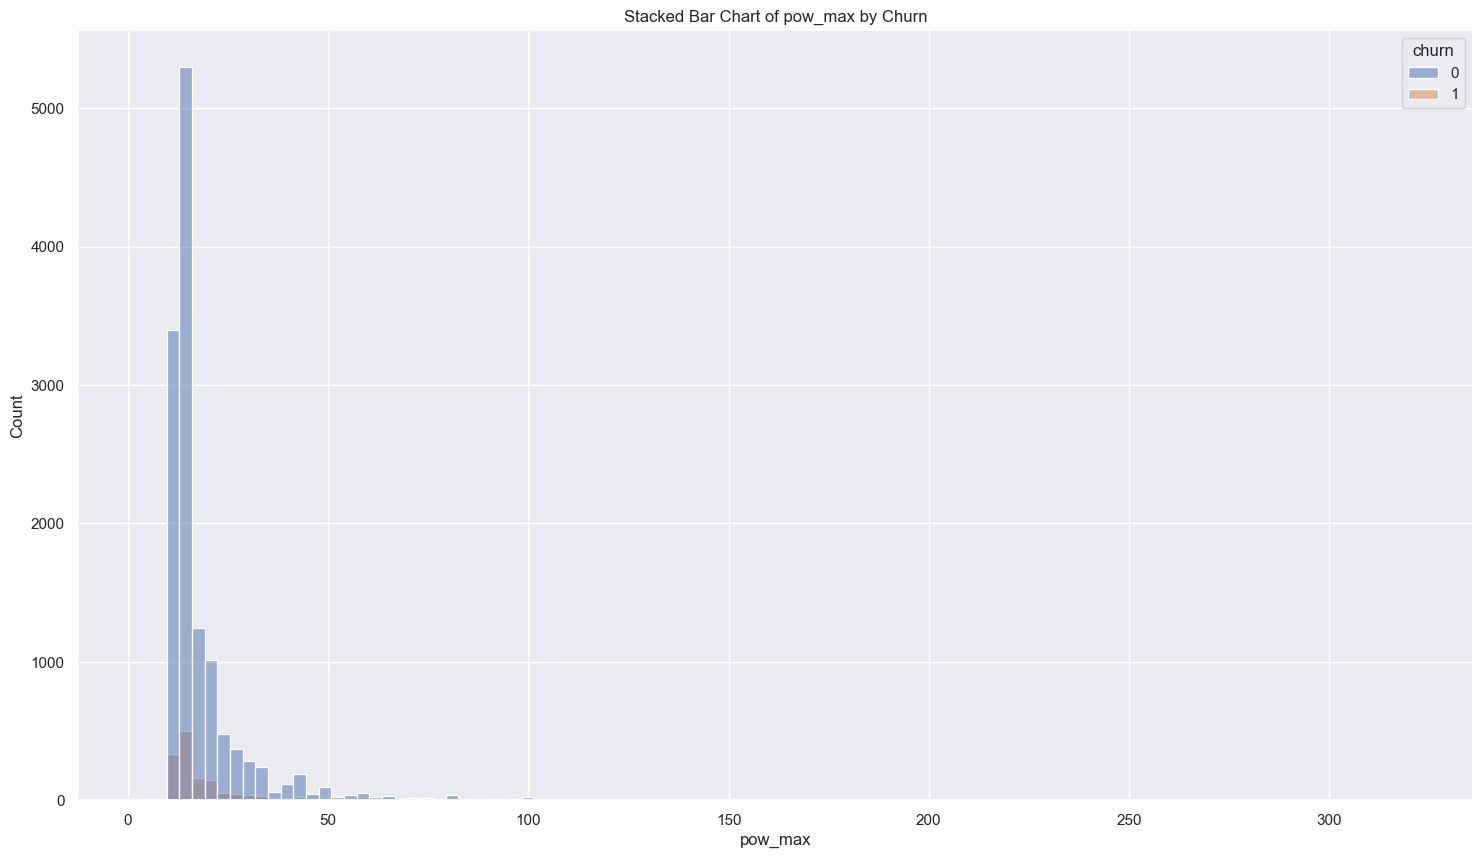

In [63]:
for attr in ['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

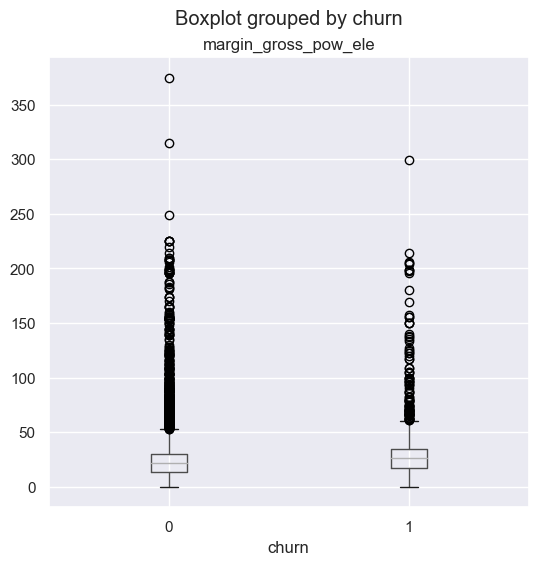

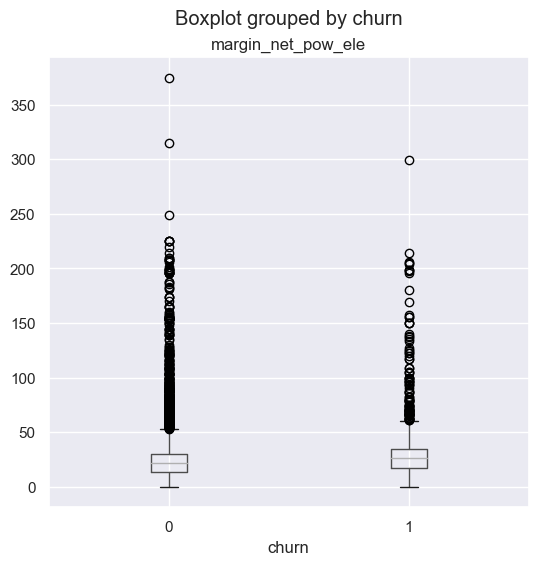

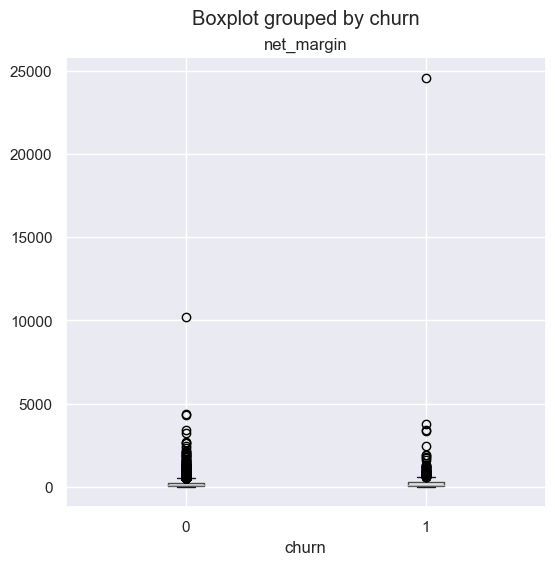

In [46]:
for col in margin:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

The analysis of the graphs above reveals that several variables in the data exhibit a significantly skewed distribution, with a long tail for higher values. Additionally, some features exhibit outliers, which may affect the accuracy of any statistical analysis or machine learning model trained on this data. Therefore, it is recommended to perform certain adjustments, such as normalization or outlier removal, to ensure the data is suitable for further analysis.

## Subscribed power

In [47]:
power = client_df[["id", "pow_max", "churn"]]

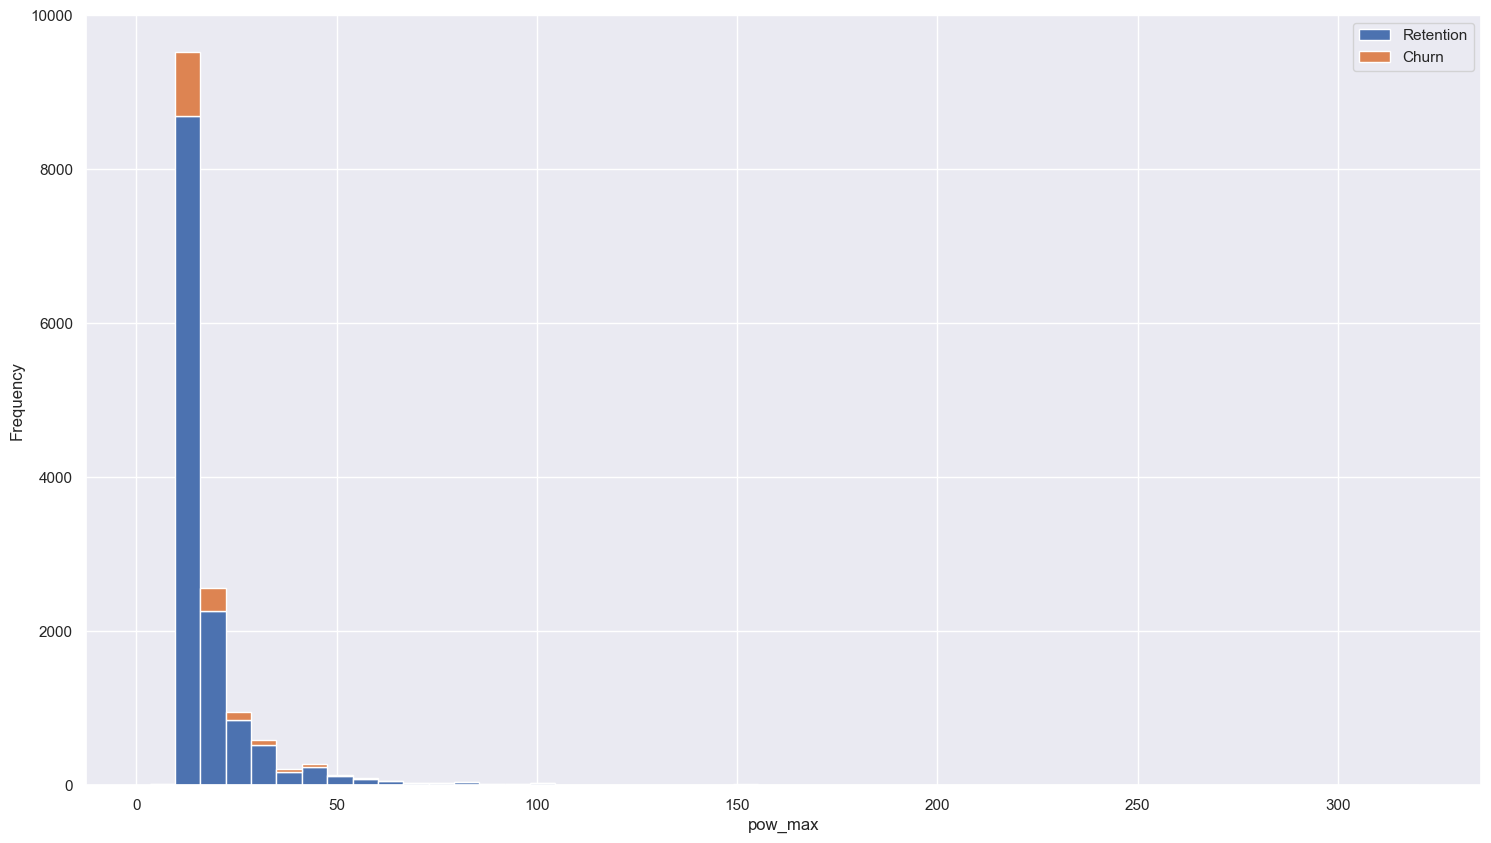

In [48]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

Based on the examination of the aforementioned graphs, it is evident that several variables within the dataset display a considerable skewness in their distribution, characterized by a prolonged tail towards higher values. Furthermore, certain features exhibit outliers, which have the potential to impact the precision of any statistical analysis or machine learning model trained on this dataset. 

**Other Columns**

In [49]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

Text(0, 0.5, 'Company base(%)')

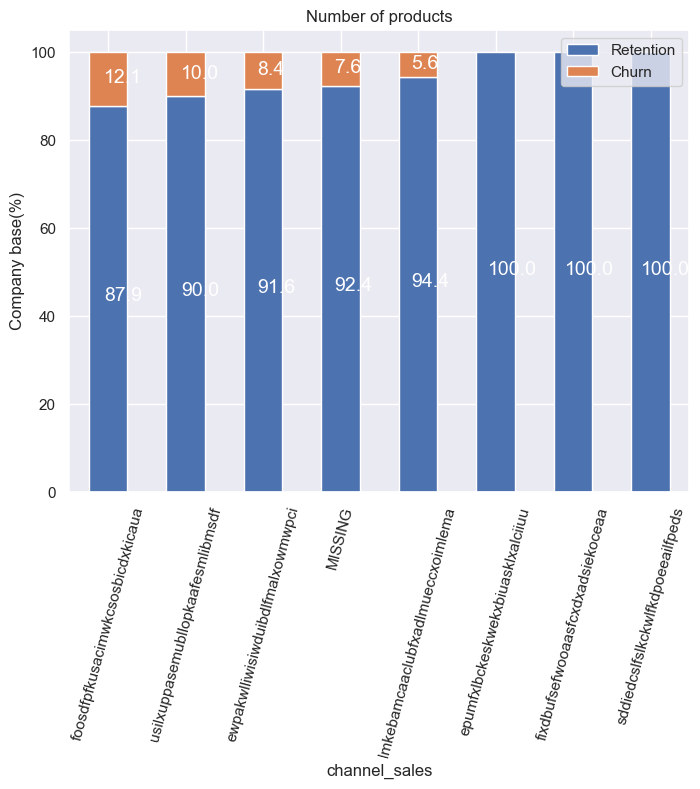

In [50]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number of products')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

In [51]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

Text(0, 0.5, 'Company base(%)')

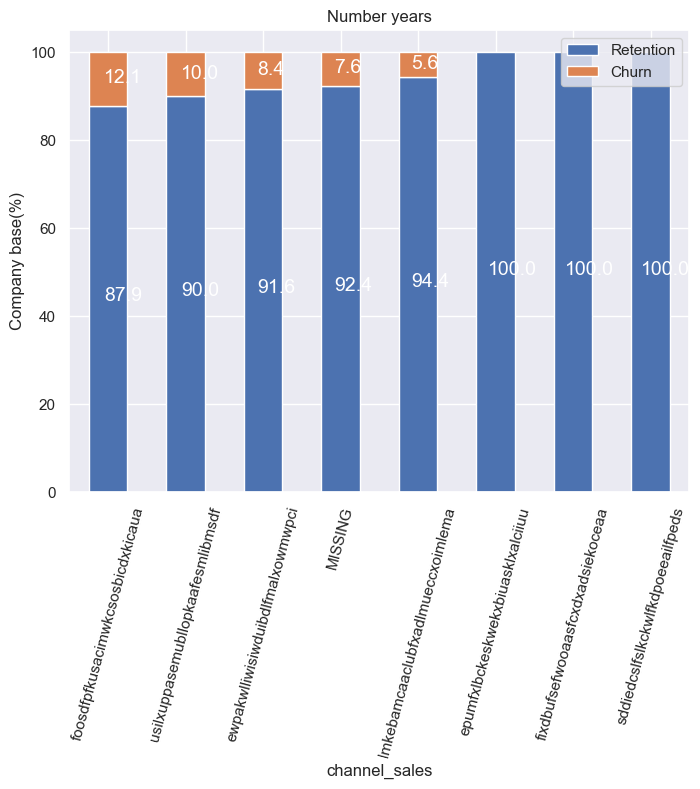

In [52]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number years')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

In [53]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

Text(0, 0.5, 'Company base(%)')

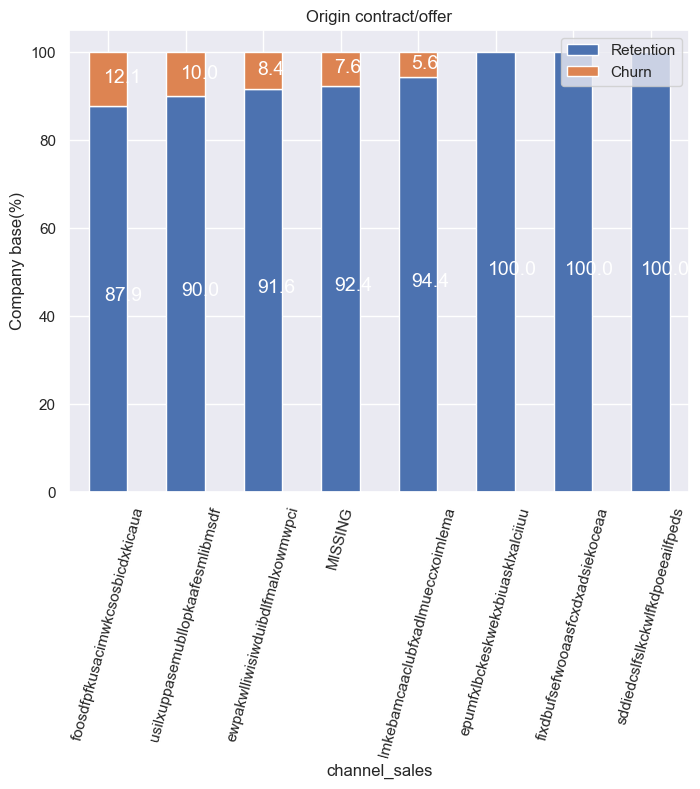

In [54]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

**Let's check Price Dataset**

In [59]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

Most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

In [60]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

## Hypothesis Investigation

Now, let's check customers sensitivity to price. When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

In [64]:
# Create mean average data
mean_year = price_df.groupby('id').mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby('id').mean().reset_index()

In [65]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [66]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [67]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [68]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [69]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_med_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [70]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [71]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [72]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


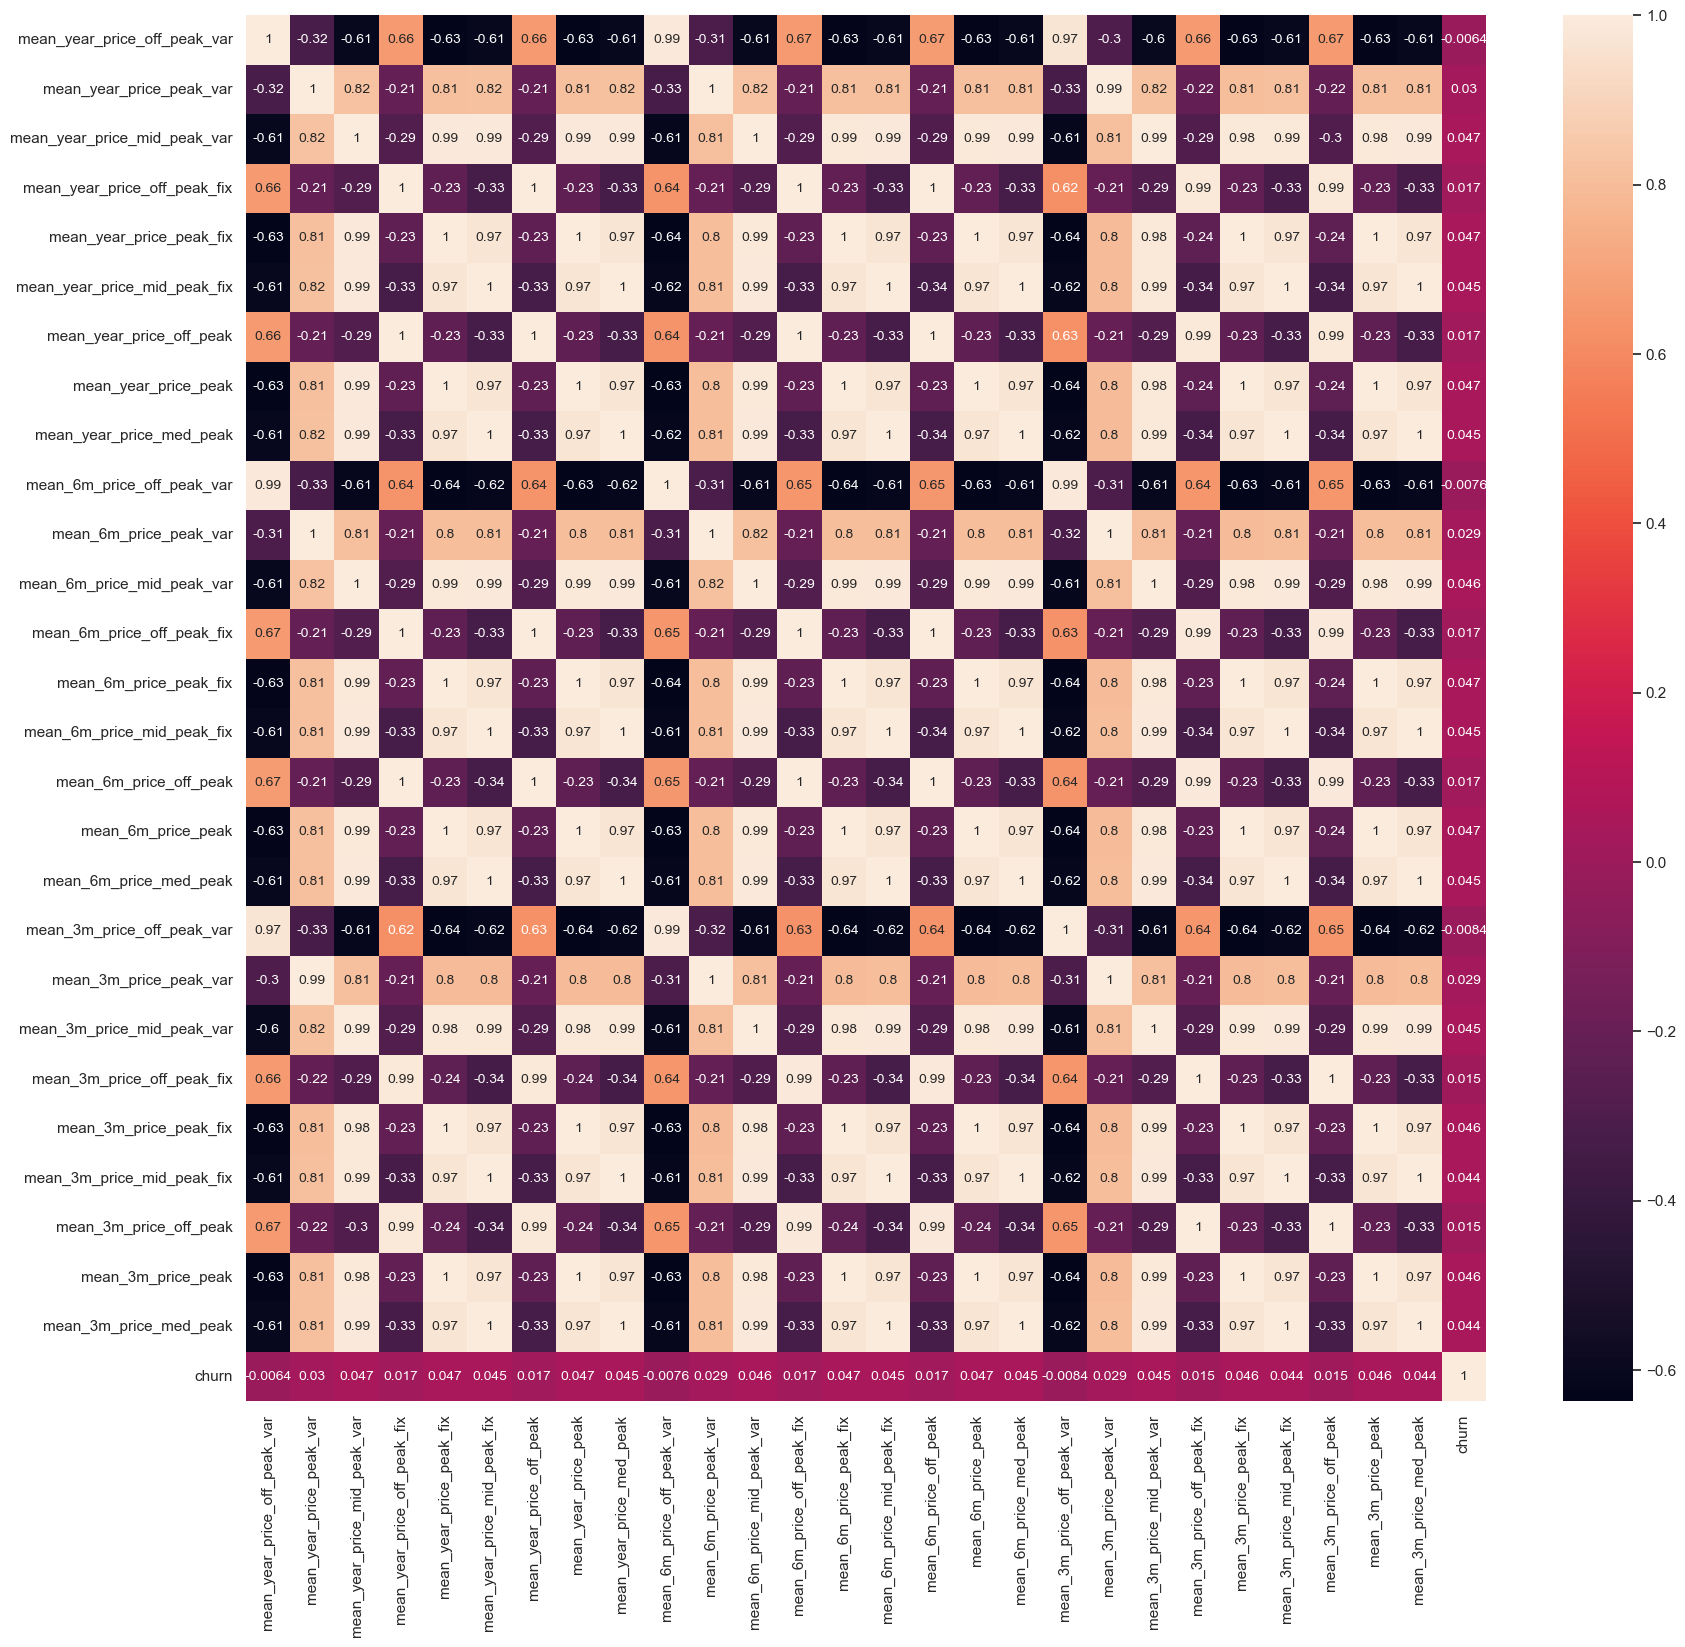

In [76]:
corr = price_churn.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
plt.show()

Although the correlation between price sensitivity and churn is generally weak, the correlation plot reveals a stronger association between price sensitivity and other variables associated with pricing. This suggests that the connection between price sensitivity and churn may not be direct or linear. Consequently, if we intend to utilize price sensitivity as a prominent factor in predicting churn, we should explore alternative methods to incorporate this feature into our analysis.

## Alternative 

Considering that customer churn remained unaffected by changes in prices over the last 6 months.

In [64]:
stat_ = ['min','max', 'mean']

price_6_month = price_df[price_df['price_date']>'2015-06-01'].drop(columns='price_date').groupby('id').agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_6_month.columns = ['_'.join(x) for x in zip(price_6_month.columns.get_level_values(0), price_6_month.columns.get_level_values(1))]
price_6_month = price_6_month.reset_index()
# add churn values
price_6_month = price_6_month.merge(client_df[['id','churn']], on = 'id', how = 'left')
# drop ids that are not inclued in the price dataset 
price_6_month = price_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_6_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_6_month[f'{attr}_mean']
price_6_month.head(5)

,id,price_off_peak_var_min,price_off_peak_var_max,price_off_peak_var_mean,price_off_peak_fix_min,price_off_peak_fix_max,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.128067,0.121266,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.148405,0.144687,44.444710,44.444710,44.444710,0.0,-0.000744,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.205742,0.202024,45.944710,45.944710,45.944710,0.0,-0.000744,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.145440,0.149902,0.146184,44.266930,44.266930,44.266930,0.0,-0.000744,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.129808,0.123007,40.728885,40.728885,40.728885,0.0,-0.001360,0.000000e+00


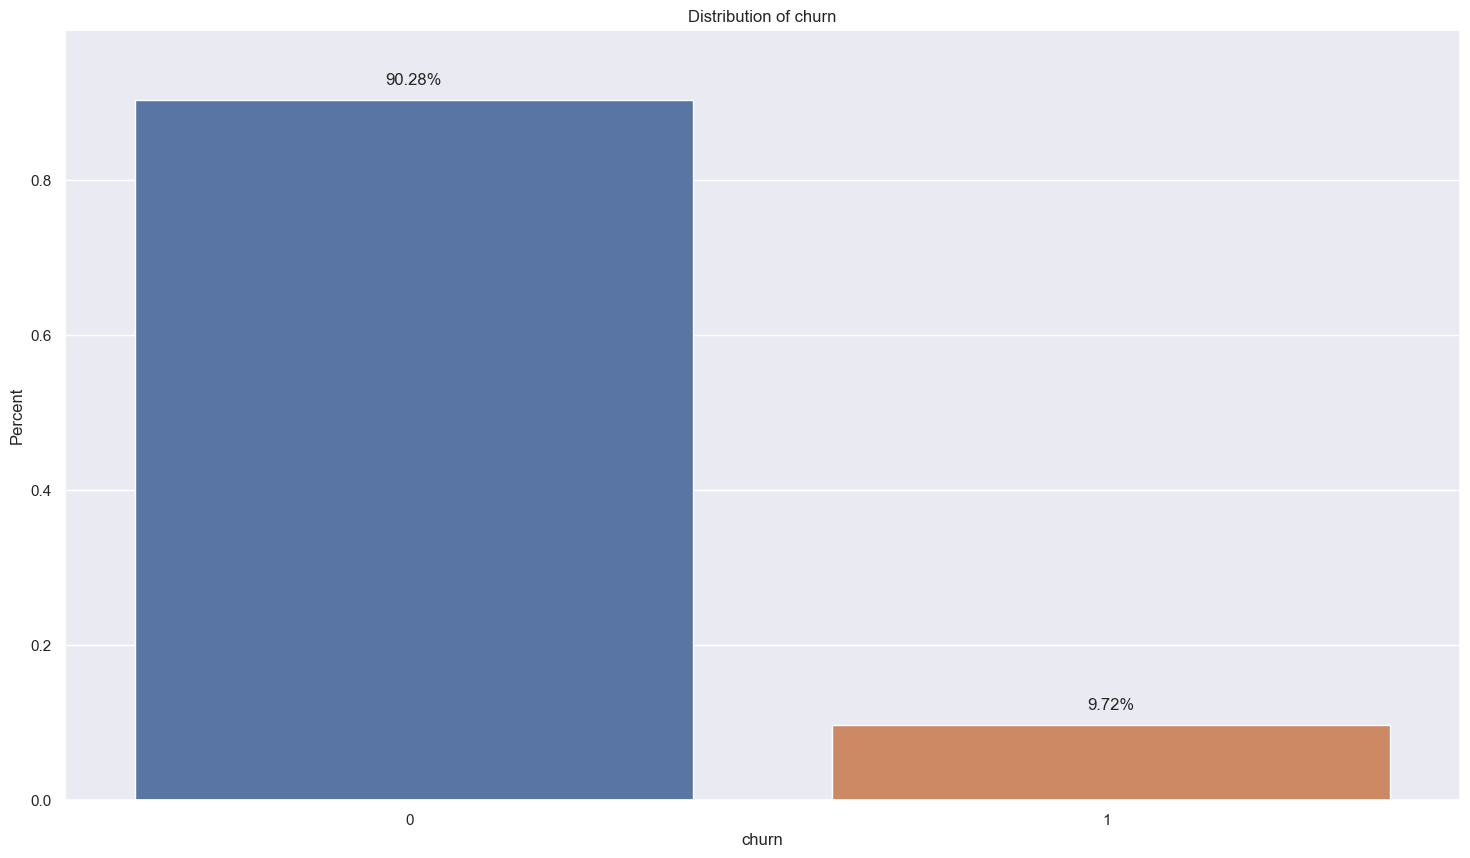

In [65]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

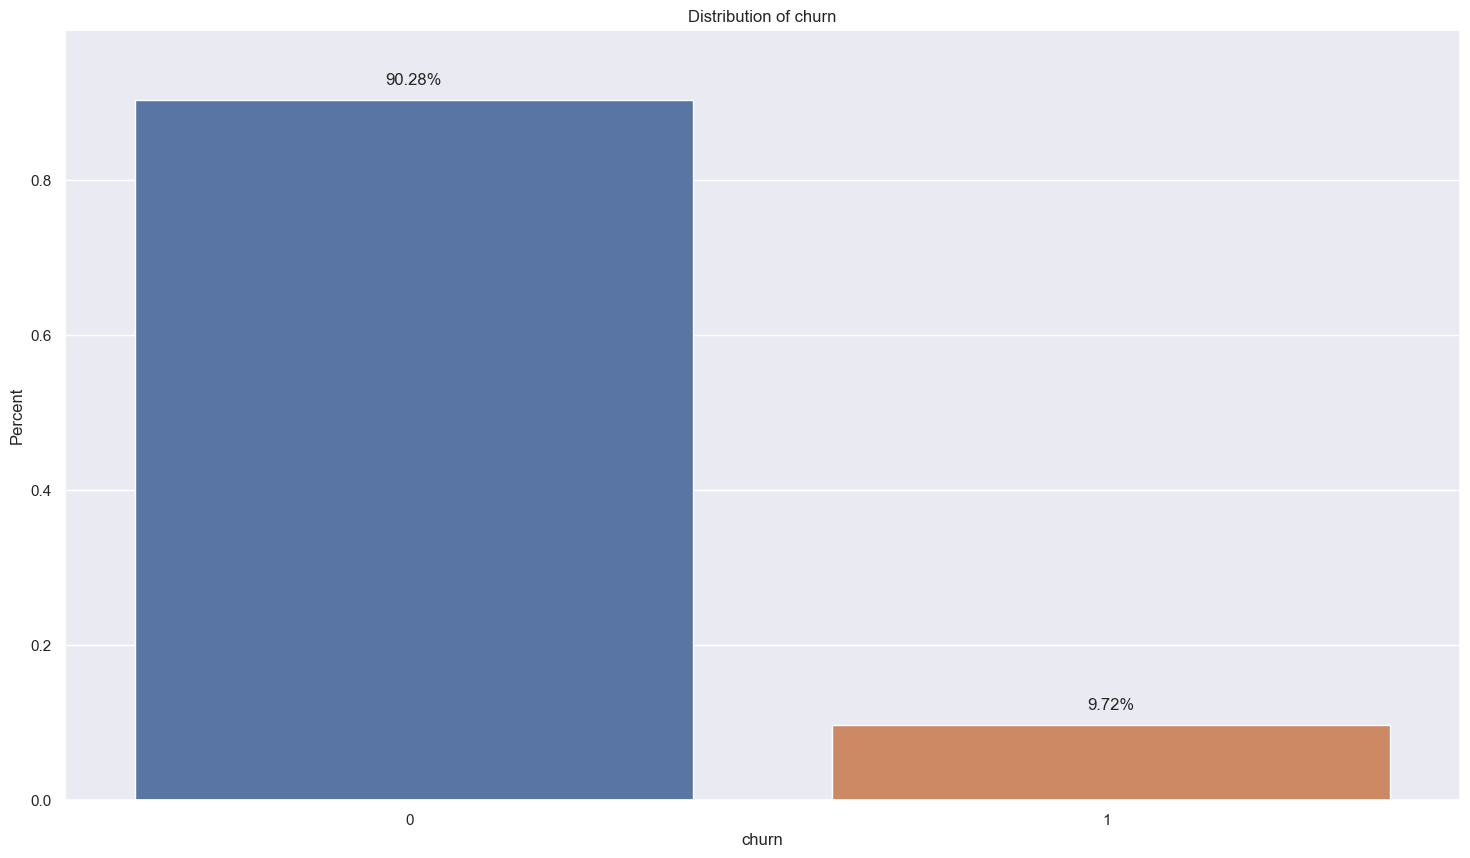

In [66]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

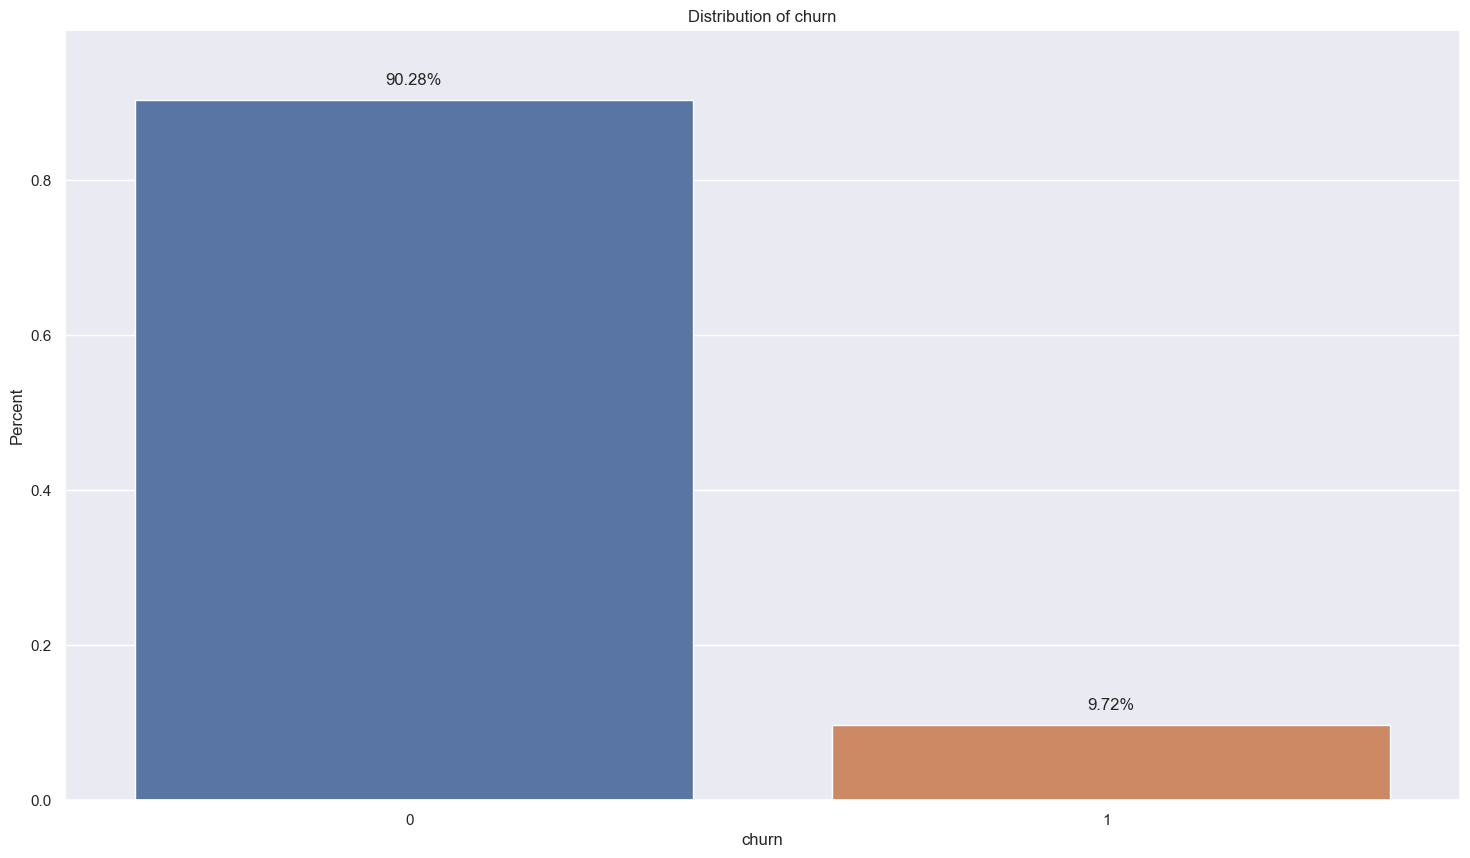

In [67]:
plot_label_bar_chart(df=price_6_month[price_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

In [68]:
price_3_month = price_df[price_df['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_3_month.columns = ['_'.join(x) for x in zip(price_3_month.columns.get_level_values(0), price_3_month.columns.get_level_values(1))]
price_3_month = price_3_month.reset_index()
# add churn values
price_3_month = price_3_month.merge(client_df[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_3_month = price_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_3_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_3_month[f'{attr}_mean']
price_3_month.head(5)

,id,price_off_peak_var_min,price_off_peak_var_max,price_off_peak_var_mean,price_off_peak_fix_min,price_off_peak_fix_max,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,0.0,7.105427e-15
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,0.0,7.105427e-15
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,0.0,0.000000e+00
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.0,0.000000e+00


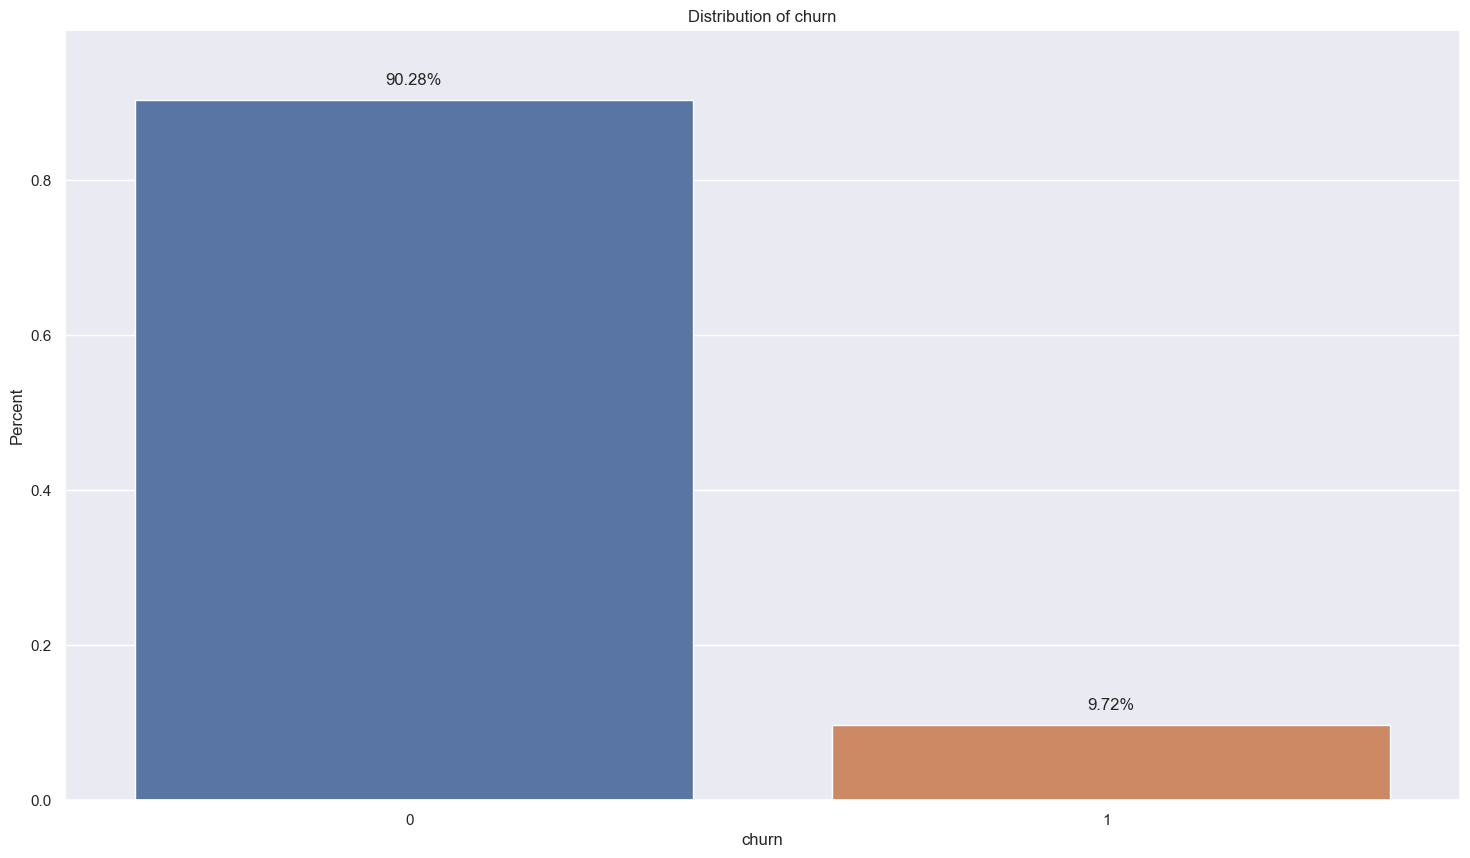

In [69]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

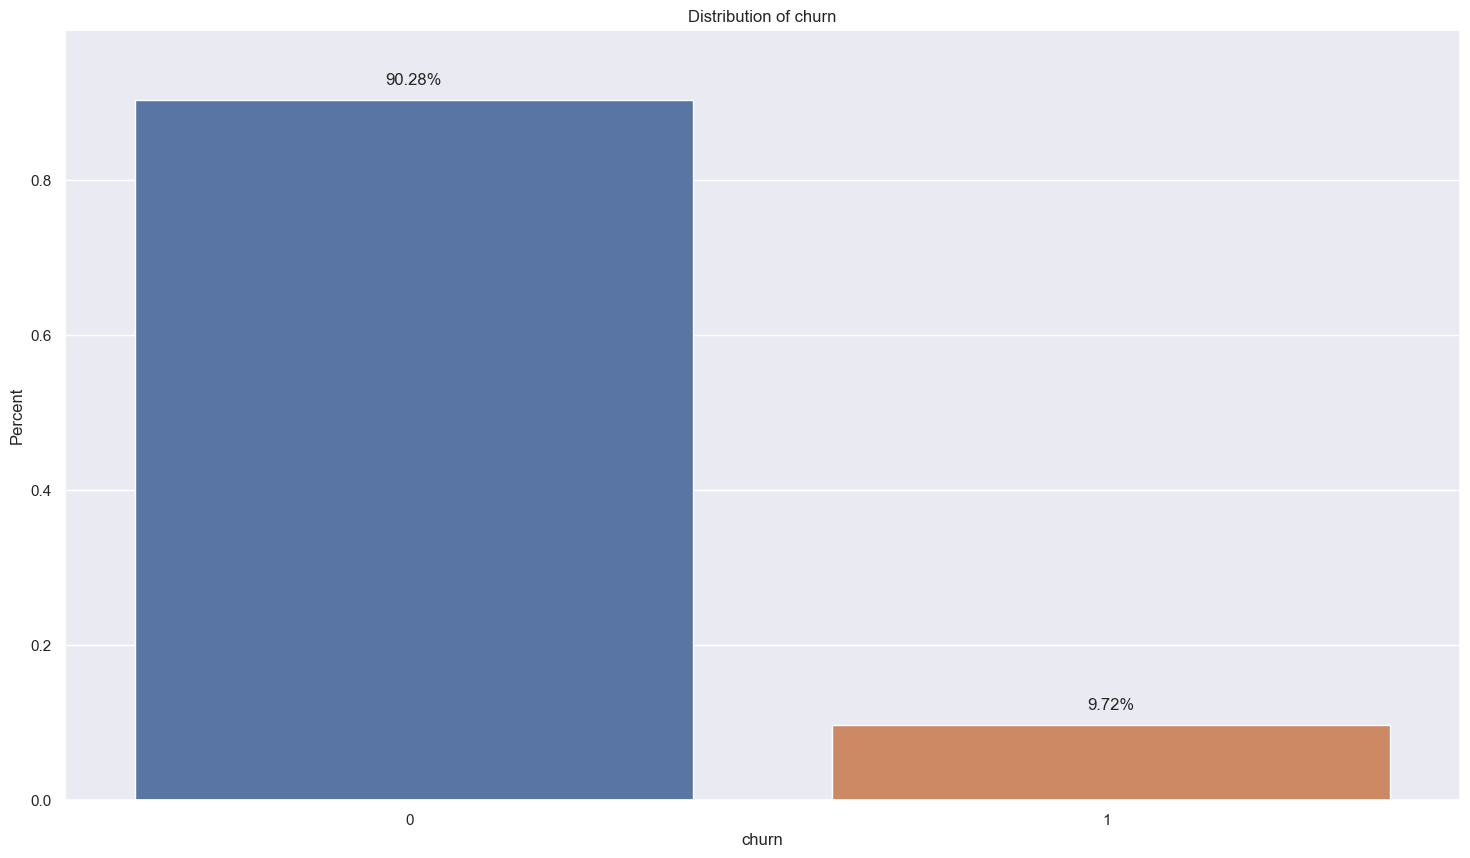

In [70]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

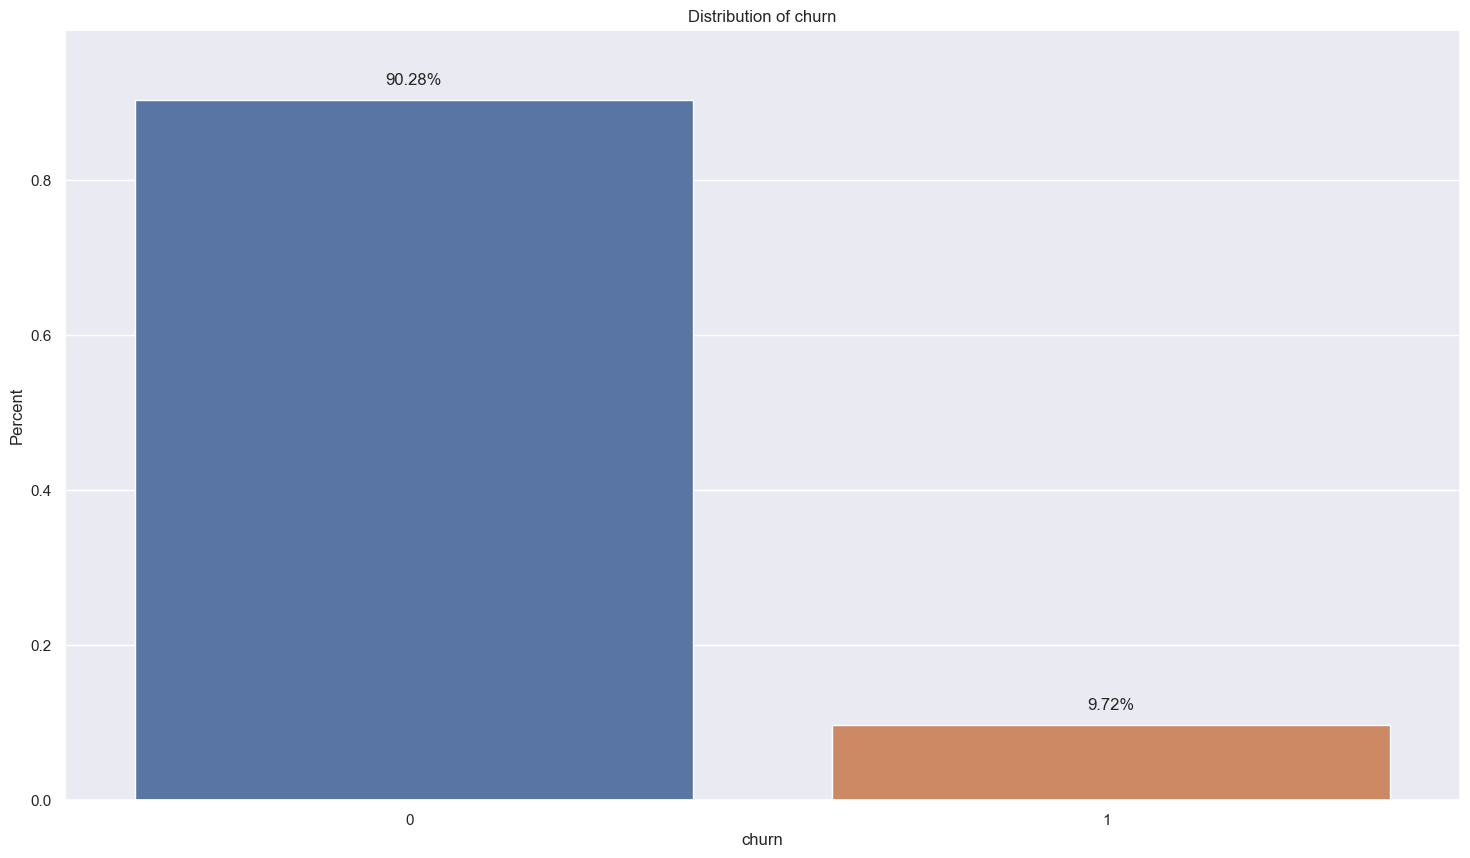

In [71]:
plot_label_bar_chart(df=price_3_month[price_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

About 9.72% of customers changed providers for 3 and 6 months

Now, we will merge the client data with price churn data for modeling in the next move. 

In [77]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')

In [78]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [79]:
churn_data.to_csv('clean_data_modeling.csv')